Сегодня допроверяю первые домашние работы, но уже могу сделать несколько общих комментариев по оформлению. Если у кого-то получится их учесть в ближайшей дз, то будет здорово. Если нет, то снижать баллы не буду так как сам затянул. Комментарии следующие:
1. Расшаривать лучше не архив с работой, а сразу папку.
2. Когда стоит задание сравнить алгоритмы, то лучше изображать их кривые обучения на одном графике, так получается сильно нагляднее. Кроме того, обычно сравнение алгоритмов предполагает использование одинаковых общих гиперпараметров. 
3. Лучше в отчете помимо графиков указывать и приблизительные значения total_reward у полученных политик. Так проще ориентироваться в качестве полученного результата. Совсем идеальный вариант - это указывать усредненные значения total_reward по нескольким запускам.
4. Не забывайте указывать ваше имя при отправке, по логину иногда сложно его понять

Алексей, очень хороший отчет. Очень порадовала таблица с результатами. Жаль, что не сделали также же про сглаживание по политикам. Совсем идеальный анализ был бы если бы в этой таблице указывалось не MaxRewad, total_reward усредненный например по 100 запускам, поскольку среда стохастична.

ИТОГО:

- изображать кривые обучения на одном графике
- равнение алгоритмов предполагает использование одинаковых общих гиперпараметров
- указывать и приблизительные значения total_reward у полученных политик
- Совсем идеальный вариант - это указывать усредненные значения total_reward по нескольким запускам.


In [828]:
# я не знаю какие есть архитектуры для RL
# я знаю для CV
# ну в данном случае мы работаем как с табличными данными
# так что модели с линейными слоями нам подходят
# если мало двух слоев будет то добавим еще
# единственное я бы попробовал нормализовать данные
# хотя если сейчас значения в состояниях масштабированы
# то можно и без нормализации можно обойтись

# нормализация нужна когда у нас, например, одна переменная в состояниях принимает значения от 0 до 1,
# а другая переменная принимает значения от 100 до 1000
# естественно они будут вносить разный вклад в функцию ошибки
# следовательно нужно эти обе переменные привести к одному масштабу
# но я думаю нам до этого пока рано
# надо поиграться с тем что имеем сейчас


# SDDSDDSA: так как не особо хорошо интерпретирует результаты
# SDDSDDSA: но он дал хороший результаты среди аутсайдеров
# SDDSDDSA: локальный результат хорош
# SDDSDDSA: но в глобальном смысле t_n должен быть большой

In [1003]:
import os
import glob
import gym
import gym_maze
import numpy as np
import random
import time
import tqdm
import json
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
exps = list(glob.glob('./experiments_mcc/*.json'))

def get_exp_type(fname):
    return fname.split('/')[-1].split('_')[0]

data = []
cnt = Counter()
for experiment in exps:
    d = json.load(open(experiment,'r'))
#     if len(d['episode_data'])==0: continue
    name = get_exp_type(experiment)
    d['type'] = name.capitalize()
    d['episode_data'] = np.array(d['episode_data'])[::,0]
    d['label'] = f"{d['id']} Ep:{d['episode_n']} Traj n:{d['trajectory_n']} Ln:{d['layers_n']} Q:{d['q_param']}"
    cnt.update(d['version'])
    data.append(d)
# data=list(sorted(data, key=lambda x: x['trajectory_n']+x['lamd']))

g_versions = set([d['version'] for d in data])
g_trajectories = set([d['trajectory_n'] for d in data])
g_trajectories_len = set([d['trajectory_len'] for d in data])
g_layers = set([str(d['layers_n']) for d in data])
g_lr1 = set([str(d['lr']) for d in data if not(str(d['version'])in['15','14'])])
g_lr2 = set([str(d['lr']) for d in data if str(d['version'])in['15','14']])

g_q_params =  set([d['q_param'] for d in data])
g_q_params1 =  set([d['q_param'] for d in data if not(str(d['version'])in['15','14'])])
g_q_params2 =  set([d['q_param'] for d in data if str(d['version'])in['15','14']])

print(len(data))
print(g_versions)
print(g_trajectories)
print(g_trajectories_len)
print(g_layers)
print(g_lr)
print(g_lr1)
print(g_lr2)
print(g_q_params)

199
{'11', '15', '13', '14', '12'}
{200, 50}
{1000}
{'[100]', '[200]', '[50]'}
{'0.001', '0.4', '0.0075', '0.3', '0.1', '0.15', '0.2', '0.01', '0.005', '0.125'}
{'0.001', '0.4', '0.3', '0.1', '0.15', '0.2', '0.01', '0.005'}
{'0.0075', '0.15', '0.01', '0.005', '0.125'}
{0.5, 0.6, 0.7, 0.75, 0.65, 0.8, 0.825, 0.85, 0.875, 0.9, 0.98, 0.925, 0.95, 0.99, 0.96, 0.975}


In [1004]:
def get_item(a, i):
    if i > len(a)-1:
        return None
#     print(len(a), i)
    return a[i]

In [1005]:
def last_std(arr,lastN):
    rewards = np.array(arr)[::,0]
    return np.std(rewards[-lastN:])

def last_mean(arr,lastN):
    rewards = np.array(arr)[::,0]
    return np.mean(rewards[-lastN:])


In [1006]:
# do nothing, fire left orientation engine, fire main engine, fire right orientation engine.a

In [1007]:
pd_data = []
for d in data:
    ed = np.array(d['episode_data'])
#     if not('lr' in d): d['lr']=0.01
#     try:
    pd_data.append([d['id'], d['version'], d['lr'], d['episode_n'], d['trajectory_n'], d['trajectory_len'], d['q_param'], 
                    d['total_elapsed'],  d['finished'], 
                    len(d['episode_data']), np.max(ed),np.min(ed[-70:]),np.mean(ed),np.mean(ed[:200]), np.mean(ed[-25:]), np.mean(ed[-50:]), np.std(ed[-50:]), 
                    len(d['layers_n']), 
                    get_item(d['layers_n'],0), get_item(d['layers_n'],1), get_item(d['layers_n'],2)
#                    ,d['episode_data']
                   ])

    df = pd.DataFrame(columns=['id', 'version', 'lr', 'episode_n', 'trajectory_n', 'trajectory_len', 'q_param', 
                               'total_elapsed', 'finished',
                           'len_ed','maxed','min70', 'meaned', 'mean200_ed', 'mean25_ed', 'mean50_ed', 'std_ed', 'layers_cnt', 'layers_n1', 'layers_n2', 'layers_n3'
#                            , 'data'
                          ],
                 data = pd_data)


In [719]:
df.to_csv('data_2.csv', sep='\t')

In [536]:
df[df['id']=='2292098547091']

Empty DataFrame
Columns: [id, version, lr, episode_n, trajectory_n, trajectory_len, q_param, total_elapsed, finished, len_ed, maxed, min70, meaned, mean200_ed, mean25_ed, mean50_ed, std_ed, layers_cnt, layers_n1, layers_n2, layers_n3]
Index: []

[0 rows x 21 columns]

In [537]:
df

id version     lr  episode_n  trajectory_n  trajectory_len  \
0    65771456929      11  0.150        200            50            1000   
1    65772251499      11  0.200        200            50            1000   
2    65773318406      11  0.300        200            50            1000   
3    65774252849      11  0.400        200            50            1000   
4    65775238157      11  0.100        200            50            1000   
..           ...     ...    ...        ...           ...             ...   
174  71113395173      13  0.001        400            50            1000   
175  71150766923      13  0.005        400            50            1000   
176  77770533742      14  0.005        400           200            1000   
177  77805012410      14  0.005        400           200            1000   
178  77830043585      14  0.005        400           200            1000   

     q_param  total_elapsed  finished  len_ed  ...      min70     meaned  \
0      0.500    3623.656214      True     200  ... -39.598019 -30.927994   
1      0.500    3563.412664      True     200  ... -39.527885 -32.875247   
2      0.500    3677.951497      True     200  ... -39.528288 -32.458679   
3      0.500    3587.621751      True     200  ... -39.611803 -29.077089   
4      0.500    3624.185472      True     200  ... -39.447066 -31.177327   
..       ...            ...       ...     ...  ...        ...        ...   
174    0.975    7114.904076      True     400  ... -11.307189  -9.005322   
175    0.975    5541.088187      True     400  ...  34.635397  34.458972   
176    0.975    6290.084609     False     122  ...   1.930676  20.180268   
177    0.980    6272.647309     False     115  ...  -3.752540  12.484988   
178    0.990    6288.812893     False     118  ... -17.680842  13.467515   

     mean200_ed  mean25_ed  mean50_ed     std_ed  layers_cnt  layers_n1  \
0    -30.927994 -32.156485 -32.450967   4.008298           1         50   
1    -32.875247 -32.128155 -32.924760   3.691733           1         50   
2    -32.458679 -30.920269 -32.052127   4.340452           1         50   
3    -29.077089 -31.864193 -32.658231   3.857015           1         50   
4    -31.177327 -31.325184 -31.323147   4.334251           1         50   
..          ...        ...        ...        ...         ...        ...   
174  -18.077683  10.338000   8.185675   8.726390           1        100   
175   12.882586  58.507951  58.587538   6.907679           1        100   
176   20.180268  53.039783  46.721266  12.535601           1        200   
177   12.484988  44.563952  36.475965  16.124878           1        200   
178   13.467515  44.646297  37.244744  11.286611           1        200   

     layers_n2 layers_n3  
0         None      None  
1         None      None  
2         None      None  
3         None      None  
4         None      None  
..         ...       ...  
174       None      None  
175       None      None  
176       None      None  
177       None      None  
178       None      None  

[179 rows x 21 columns]

In [540]:
df.sort_values('maxed', ascending=False).head(10)

id version    lr  episode_n  trajectory_n  trajectory_len  \
106  68866188997      12  0.30        400            50            1000   
163  70720468754      13  0.40        400            50            1000   
76   68448510492      12  0.10        400            50            1000   
154  70410068197      13  0.30        400            50            1000   
92   68666199134      12  0.10        400            50            1000   
172  71037817017      13  0.10        400            50            1000   
81   68514409868      12  0.20        400            50            1000   
104  68837581774      12  0.15        400            50            1000   
165  70787338684      13  0.01        400            50            1000   
169  70931428079      13  0.20        400            50            1000   

     q_param  total_elapsed  finished  len_ed  ...      min70     meaned  \
106    0.975    8128.821393      True     400  ... -42.500439  13.144885   
163    0.950    8665.701207      True     400  ... -46.963037  -4.566845   
76     0.875    8740.987881      True     400  ... -16.261921   8.031807   
154    0.925    9117.359857      True     400  ... -40.960405 -14.192356   
92     0.925    7970.621362      True     400  ... -16.542854  20.071724   
172    0.975    5869.773415      True     400  ...  -6.262414  36.867827   
81     0.900    7534.220952      True     400  ... -19.671361  30.318784   
104    0.975    6892.309365      True     400  ...  27.188403  38.189878   
165    0.950    6505.109896      True     400  ...  -2.605563  34.849391   
169    0.975    6302.759434      True     400  ...  -6.571065  25.657074   

     mean200_ed  mean25_ed  mean50_ed     std_ed  layers_cnt  layers_n1  \
106   33.505993 -23.976940 -24.574392   9.971445           1         50   
163  -19.362150 -29.866501 -24.787488  15.651089           1        100   
76   -16.504626  26.791318  37.850316  20.632709           1         50   
154   -0.907043 -26.662167 -26.777862   6.797995           1        100   
92    -0.646137  42.518090  35.872741  27.032341           1         50   
172   21.148438  50.989577  51.793675  22.138917           1        100   
81    25.557062  51.124019  43.957877  17.601949           1         50   
104   33.583332  52.601916  54.457768  10.282173           1         50   
165   20.590285  32.569148  44.162642  18.909370           1        100   
169    6.487657  29.590353  41.020777  20.756274           1        100   

     layers_n2 layers_n3  
106       None      None  
163       None      None  
76        None      None  
154       None      None  
92        None      None  
172       None      None  
81        None      None  
104       None      None  
165       None      None  
169       None      None  

[10 rows x 21 columns]

In [541]:
df.sort_values('mean50_ed', ascending=False).head(10)

id version     lr  episode_n  trajectory_n  trajectory_len  \
175  71150766923      13  0.005        400            50            1000   
111  68951149675      12  0.005        400            50            1000   
109  68917656421      12  0.010        400            50            1000   
167  70858516335      13  0.005        400            50            1000   
173  71076239173      13  0.010        400            50            1000   
104  68837581774      12  0.150        400            50            1000   
101  68796186114      12  0.010        400            50            1000   
156  70477708732      13  0.100        400            50            1000   
172  71037817017      13  0.100        400            50            1000   
93   68682978133      12  0.010        400            50            1000   

     q_param  total_elapsed  finished  len_ed  ...      min70     meaned  \
175    0.975    5541.088187      True     400  ...  34.635397  34.458972   
111    0.975    7729.784511      True     400  ...  41.444864  25.066014   
109    0.975    7150.666041      True     400  ...  24.552023  33.997689   
167    0.950    6576.175989      True     400  ...  33.773333  30.529213   
173    0.975    5603.157811      True     400  ...  15.136737  41.412400   
104    0.975    6892.309365      True     400  ...  27.188403  38.189878   
101    0.950    6806.808478      True     400  ...   7.908864  33.237595   
156    0.925    7616.802451      True     400  ...   5.605551  21.445806   
172    0.975    5869.773415      True     400  ...  -6.262414  36.867827   
93     0.925    7416.258458      True     400  ...  29.092516  31.990777   

     mean200_ed  mean25_ed  mean50_ed     std_ed  layers_cnt  layers_n1  \
175   12.882586  58.507951  58.587538   6.907679           1        100   
111   -3.382777  58.050935  58.502414   6.770584           1         50   
109   14.211514  57.971843  57.335162   6.405665           1         50   
167   11.765238  53.564418  55.739846   7.676318           1        100   
173   28.500165  56.156445  55.712784  11.728456           1        100   
104   33.583332  52.601916  54.457768  10.282173           1         50   
101   17.036448  56.847250  53.169186  10.200043           1         50   
156   -8.032287  55.302512  52.799796  16.734677           1        100   
172   21.148438  50.989577  51.793675  22.138917           1        100   
93    14.841789  53.291960  51.104011   8.309830           1         50   

     layers_n2 layers_n3  
175       None      None  
111       None      None  
109       None      None  
167       None      None  
173       None      None  
104       None      None  
101       None      None  
156       None      None  
172       None      None  
93        None      None  

[10 rows x 21 columns]

In [542]:
df.sort_values('mean25_ed', ascending=False).head(10)

id version     lr  episode_n  trajectory_n  trajectory_len  \
175  71150766923      13  0.005        400            50            1000   
111  68951149675      12  0.005        400            50            1000   
109  68917656421      12  0.010        400            50            1000   
101  68796186114      12  0.010        400            50            1000   
173  71076239173      13  0.010        400            50            1000   
156  70477708732      13  0.100        400            50            1000   
157  70511984977      13  0.010        400            50            1000   
167  70858516335      13  0.005        400            50            1000   
93   68682978133      12  0.010        400            50            1000   
176  77770533742      14  0.005        400           200            1000   

     q_param  total_elapsed  finished  len_ed  ...      min70     meaned  \
175    0.975    5541.088187      True     400  ...  34.635397  34.458972   
111    0.975    7729.784511      True     400  ...  41.444864  25.066014   
109    0.975    7150.666041      True     400  ...  24.552023  33.997689   
101    0.950    6806.808478      True     400  ...   7.908864  33.237595   
173    0.975    5603.157811      True     400  ...  15.136737  41.412400   
156    0.925    7616.802451      True     400  ...   5.605551  21.445806   
157    0.925    6988.279839      True     400  ...  15.902704  34.915227   
167    0.950    6576.175989      True     400  ...  33.773333  30.529213   
93     0.925    7416.258458      True     400  ...  29.092516  31.990777   
176    0.975    6290.084609     False     122  ...   1.930676  20.180268   

     mean200_ed  mean25_ed  mean50_ed     std_ed  layers_cnt  layers_n1  \
175   12.882586  58.507951  58.587538   6.907679           1        100   
111   -3.382777  58.050935  58.502414   6.770584           1         50   
109   14.211514  57.971843  57.335162   6.405665           1         50   
101   17.036448  56.847250  53.169186  10.200043           1         50   
173   28.500165  56.156445  55.712784  11.728456           1        100   
156   -8.032287  55.302512  52.799796  16.734677           1        100   
157   25.907620  53.919614  49.549742  13.249598           1        100   
167   11.765238  53.564418  55.739846   7.676318           1        100   
93    14.841789  53.291960  51.104011   8.309830           1         50   
176   20.180268  53.039783  46.721266  12.535601           1        200   

     layers_n2 layers_n3  
175       None      None  
111       None      None  
109       None      None  
101       None      None  
173       None      None  
156       None      None  
157       None      None  
167       None      None  
93        None      None  
176       None      None  

[10 rows x 21 columns]

In [424]:
df[df['layers_cnt']==2].sort_values('mean25_ed', ascending=False)

Empty DataFrame
Columns: [id, version, episode_n, trajectory_n, trajectory_len, q_param, lr, total_elapsed, finished, len_ed, mean25_ed, mean50_ed, max, std_ed, layers_cnt, layers_n1, layers_n2, layers_n3]
Index: []

влияние размера одного слоя сети сети на  
Q:0.5  tn:100 L:[...]

In [559]:
cnt = Counter()
for d in data:
#     cnt.update([f"Q:{d['q_param']}"])
#     cnt.update([f"Q:{d['q_param']} tl:{d['trajectory_len']}"])
#     cnt.update([f"Q:{d['q_param']} tl:{d['trajectory_len']} tn:{d['trajectory_n']}"])
    cnt.update([f"lr:{d['lr']} Q:{d['q_param']} tn:{d['trajectory_n']} L:{str(d['layers_n'])}"])
cnt
sorted(cnt.items())


[('lr:0.001 Q:0.5 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.6 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.65 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.7 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.75 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.8 tn:50 L:[100]', 1),
 ('lr:0.001 Q:0.8 tn:50 L:[50]', 2),
 ('lr:0.001 Q:0.825 tn:50 L:[100]', 1),
 ('lr:0.001 Q:0.825 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.85 tn:50 L:[100]', 1),
 ('lr:0.001 Q:0.85 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.875 tn:50 L:[100]', 1),
 ('lr:0.001 Q:0.875 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.9 tn:50 L:[100]', 1),
 ('lr:0.001 Q:0.9 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.925 tn:50 L:[100]', 1),
 ('lr:0.001 Q:0.925 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.95 tn:50 L:[100]', 1),
 ('lr:0.001 Q:0.95 tn:50 L:[50]', 1),
 ('lr:0.001 Q:0.975 tn:50 L:[100]', 1),
 ('lr:0.001 Q:0.975 tn:50 L:[50]', 1),
 ('lr:0.005 Q:0.5 tn:50 L:[50]', 1),
 ('lr:0.005 Q:0.6 tn:50 L:[50]', 1),
 ('lr:0.005 Q:0.65 tn:50 L:[50]', 1),
 ('lr:0.005 Q:0.7 tn:50 L:[50]', 1),
 ('lr:0.005 Q:0.75 tn:50 L:[50]', 1),
 ('lr:

In [560]:
listyles = {"Laplase":'dashed','Policy':'solid','Cem': 'dotted'}

for group in sorted(groups):
# for group in groups:
    graph_trajectory(data, group)

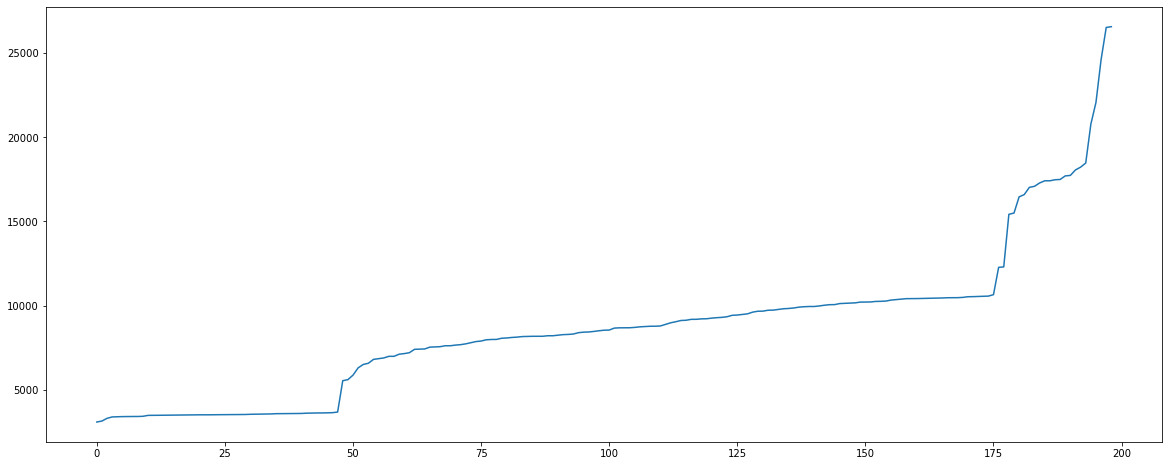

In [1015]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(20,8))
total_elapseds = [ ed['total_elapsed'] for i, ed in enumerate(graph_data)]
plt.plot(range(len(total_elapseds)), total_elapseds)

In [1016]:
valid = df['len_ed']==df['episode_n']

In [1017]:
np.sum(valid)

193

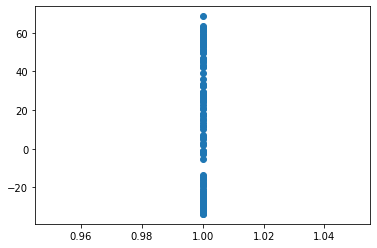

In [1018]:
plt.scatter(df[valid]['layers_cnt'], df[valid]['mean25_ed'])

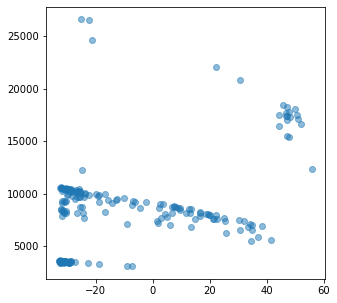

In [1024]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(5,5))
total_elapseds = [ed['total_elapsed'] for i, ed in enumerate(graph_data)]
trajectory_n = [np.mean(ed['episode_data']) for i, ed in enumerate(graph_data)]
plt.scatter(trajectory_n, total_elapseds, alpha=0.5)

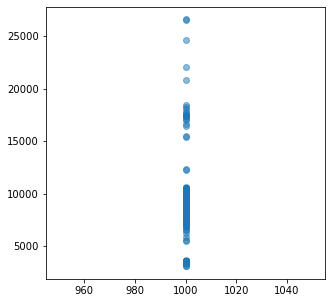

In [1020]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(5,5))
total_elapseds = [ed['total_elapsed'] for i, ed in enumerate(graph_data)]
trajectory_n = [ed['trajectory_len'] for i, ed in enumerate(graph_data)]
plt.scatter(trajectory_n, total_elapseds, alpha=0.5)

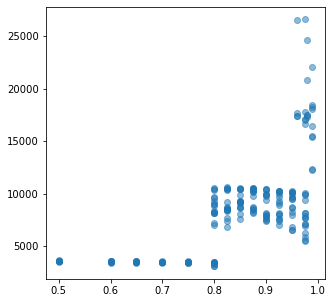

In [1021]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(5,5))
total_elapseds = [ed['total_elapsed'] for i, ed in enumerate(graph_data)]
trajectory_n = [ed['q_param'] for i, ed in enumerate(graph_data)]
plt.scatter(trajectory_n, total_elapseds, alpha=0.5)

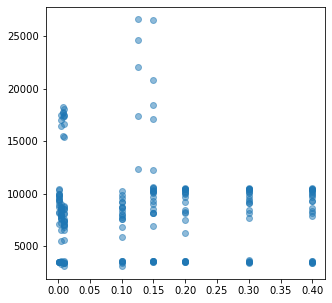

In [1025]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(5,5))
total_elapseds = [ed['total_elapsed'] for i, ed in enumerate(graph_data)]
trajectory_n = [ed['lr'] for i, ed in enumerate(graph_data)]
plt.scatter(trajectory_n, total_elapseds, alpha=0.5)

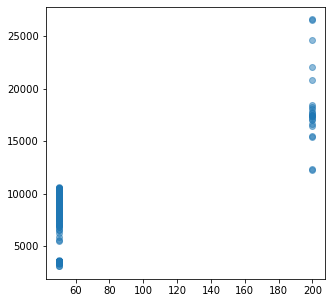

In [1022]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(5,5))
total_elapseds = [ed['total_elapsed'] for i, ed in enumerate(graph_data)]
trajectory_n = [ed['trajectory_n'] for i, ed in enumerate(graph_data)]
plt.scatter(trajectory_n, total_elapseds, alpha=0.5)

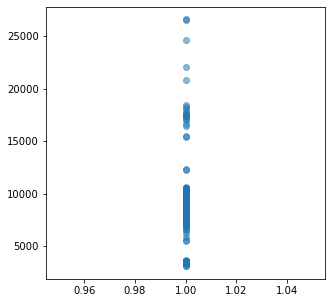

In [1023]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['total_elapsed']):
    graph_data.append(ed)

plt.figure(figsize=(5,5))
total_elapseds = [ed['total_elapsed'] for i, ed in enumerate(graph_data)]
trajectory_n = [len(ed['layers_n']) for i, ed in enumerate(graph_data)]
plt.scatter(trajectory_n, total_elapseds, alpha=0.5)

Q Parameter

In [494]:
df

id version     lr  episode_n  trajectory_n  trajectory_len  \
0    65771456929      11  0.150        200            50            1000   
1    65772251499      11  0.200        200            50            1000   
2    65773318406      11  0.300        200            50            1000   
3    65774252849      11  0.400        200            50            1000   
4    65775238157      11  0.100        200            50            1000   
..           ...     ...    ...        ...           ...             ...   
171  71000558507      13  0.400        400            50            1000   
172  71037817017      13  0.100        400            50            1000   
173  71076239173      13  0.010        400            50            1000   
174  71113395173      13  0.001        400            50            1000   
175  71150766923      13  0.005        400            50            1000   

     q_param  total_elapsed  finished  len_ed  ...      min70     meaned  \
0      0.500    3623.656214      True     200  ... -39.598019 -30.927994   
1      0.500    3563.412664      True     200  ... -39.527885 -32.875247   
2      0.500    3677.951497      True     200  ... -39.528288 -32.458679   
3      0.500    3587.621751      True     200  ... -39.611803 -29.077089   
4      0.500    3624.185472      True     200  ... -39.447066 -31.177327   
..       ...            ...       ...     ...  ...        ...        ...   
171    0.975    7896.759211      True     400  ... -41.094718 -31.602580   
172    0.975    5869.773415      True     400  ...  -6.262414  36.867827   
173    0.975    5603.157811      True     400  ...  15.136737  41.412400   
174    0.975    7114.904076      True     400  ... -11.307189  -9.005322   
175    0.975    5541.088187      True     400  ...  34.635397  34.458972   

     mean200_ed  mean25_ed  mean50_ed     std_ed  layers_cnt  layers_n1  \
0    -30.927994 -32.156485 -32.450967   4.008298           1         50   
1    -32.875247 -32.128155 -32.924760   3.691733           1         50   
2    -32.458679 -30.920269 -32.052127   4.340452           1         50   
3    -29.077089 -31.864193 -32.658231   3.857015           1         50   
4    -31.177327 -31.325184 -31.323147   4.334251           1         50   
..          ...        ...        ...        ...         ...        ...   
171  -40.625351 -24.038131 -23.772577   7.145130           1        100   
172   21.148438  50.989577  51.793675  22.138917           1        100   
173   28.500165  56.156445  55.712784  11.728456           1        100   
174  -18.077683  10.338000   8.185675   8.726390           1        100   
175   12.882586  58.507951  58.587538   6.907679           1        100   

     layers_n2 layers_n3  
0         None      None  
1         None      None  
2         None      None  
3         None      None  
4         None      None  
..         ...       ...  
171       None      None  
172       None      None  
173       None      None  
174       None      None  
175       None      None  

[176 rows x 21 columns]

In [498]:
for c in ['lr','episode_n','trajectory_n','trajectory_len','q_param','layers_n1']:
    print(c, list(sorted(df[c].unique())))

lr [0.001, 0.005, 0.01, 0.1, 0.15, 0.2, 0.3, 0.4]
episode_n [200, 400]
trajectory_n [50]
trajectory_len [1000]
q_param [0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975]
layers_n1 [50, 100]


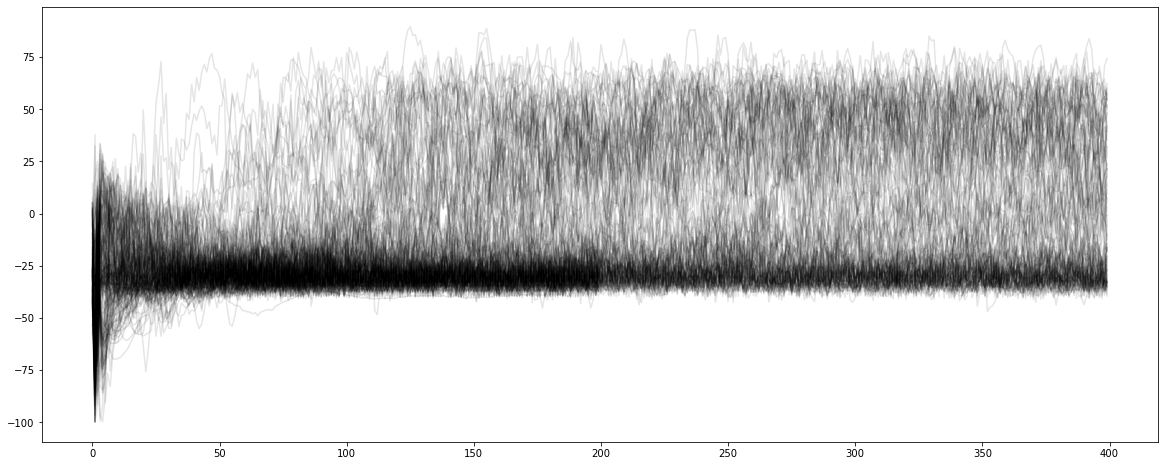

In [722]:
plt.figure(figsize=(20,8))
for i, ed in enumerate(data):
    episode_data = np.array(ed['episode_data'])
#     lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
#     print(ed['id'], lable,np.max(ed['episode_data']), np.argmax(ed['episode_data']))
    plt.plot(range(len(episode_data)), 
             episode_data,
             alpha=0.1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 6 else 'solid',
             color='black',
             label=lable)
# leg = plt.legend(loc='lower left')
ylim = plt.gca().get_ylim()
plt.show()

In [576]:
df100 = df.query('layers_n1==100')
df50 = df.query('layers_n1==50')
df100.shape, df50.shape

((64, 21), (112, 21))

In [578]:
mdf = df100.merge(df50, on=['lr','q_param','trajectory_n', 'trajectory_len', 'episode_n','len_ed'], validate='one_to_many',)

In [580]:
mdf[['meaned_x', 'meaned_y']]

meaned_x   meaned_y
0    3.638811 -31.171324
1  -32.377266 -31.151131
2  -29.895228 -31.651636
3  -30.070954 -30.299000
4   -9.963943 -31.858959
..        ...        ...
59 -31.602580 -23.786030
60  36.867827 -22.148345
61  41.412400  33.997689
62  -9.005322 -12.779473
63  34.458972  25.066014

[64 rows x 2 columns]

(array([26.,  5.,  3.,  5.,  4.,  7.,  3.,  5.,  1.,  5.]),
 array([-32.37726636, -24.99829977, -17.61933317, -10.24036658,
         -2.86139999,   4.51756661,  11.8965332 ,  19.2754998 ,
         26.65446639,  34.03343298,  41.41239958]),
 <a list of 10 Patch objects>)

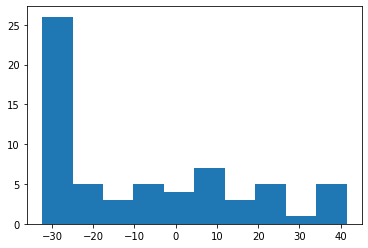

In [527]:
plt.hist(df.query('layers_n1==100')['meaned'].tolist())

In [617]:
from scipy.stats import shapiro, normaltest, chisquare

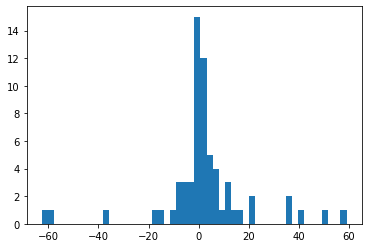

Shapiro-Wilk test:0.80778295 p-Value,1.05881611e-07
D’Agostino’s K-squared:15.44468, 0.00044282329 


In [635]:
d = mdf['meaned_x'] - mdf['meaned_y']
plt.hist(d, bins=50)
plt.show()
stat, pv = shapiro(d)
print(f'Shapiro-Wilk test:{stat:0.8} p-Value,{pv:0.9}')
stat, pv = normaltest(d)
print(f'D’Agostino’s K-squared:{stat:0.8}, {pv:0.8} ')

Shapiro-Wilk test: 0.9246436953544617 p-Value 0.00078128651
D’Agostino’s K-squared: 5.317540300827236 0.07003430045732105


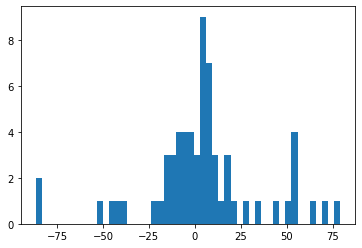

In [630]:
d = mdf['maxed_x'] - mdf['maxed_y']
stat, pv = shapiro(d)
print('Shapiro-Wilk test:',stat, 'p-Value',f"{pv:0.8}")
stat, pv = normaltest(d)
print('D’Agostino’s K-squared:', stat, pv )
plt.hist(d, bins=50)
plt.show()

In [626]:
d = mdf['maxed_x'] - mdf['maxed_y']
stat, pv = chisquare(d)
print('Сhi Square:',stat, 'p-Value',f"{pv:0.8}")

Сhi Square: 14128.462302018494 p-Value 0.0


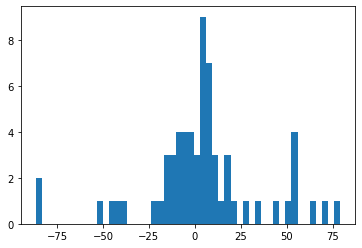

In [616]:
plt.hist(d, bins=50)
plt.show()

(0.0, 1.0)

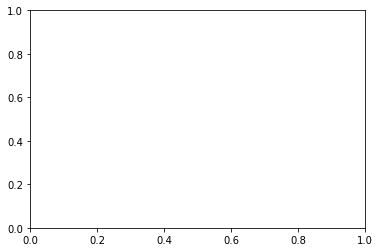

In [653]:
plt.gca().get_ylim()

In [679]:
def box_plot(bygroup):
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_subplot(111)
    plt.figure(figsize=(10,4))
    box_plt = []
    lables = []
    print(bygroup)
    
    for i, ed in enumerate(data):
        if ed['trajectory_n'] != bygroup: continue
        episode_data = np.array(ed['episode_data'])
        lables.append(str(i+1)+' ' +ed['label'])
        box_plt.append(episode_data[::,0])
    ax.boxplot(box_plt)
#     plt.title(bytype)
    plt.show()
    print('\n'.join(lables))
    return None
    #     plt.hist(episode_data[::,0], alpha=0.2, bins=25)

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.figure(figsize=(10,4))
box_plt = []
lables = []
print(name)
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lables.append(str(i+1)+' ' +ed['label'])
    box_plot(ax, episode_data[::,0], [i], edge_color=type_colors[ed['type']])
plt.show()
    graph_trajectory(list(filter(lambda x: x['type'] == 'Cem', data)), group)

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


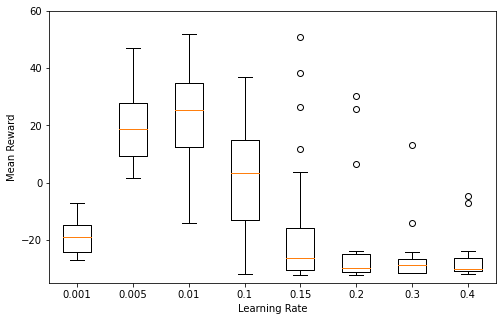

In [980]:
fig = plt.figure(figsize =(8, 5))
ax = fig.add_subplot(111)
box_plots = []
for lr in sorted(g_lr1):
    box_plots.append(df.query(f'lr=={lr} and episode_n==400')['meaned'])
ax.boxplot(box_plots, labels=list(map(str, sorted(g_lr1))))
plt.xlabel('Learning Rate')
plt.ylabel('Mean Reward')
# plt.title('')
plt.ylim((-35, 60))
plt.show()


/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


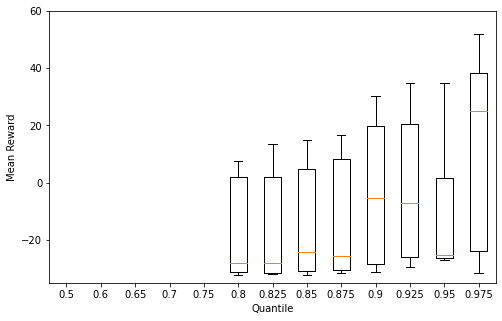

In [1012]:
fig = plt.figure(figsize =(8, 5))
ax = fig.add_subplot(111)
box_plots = []
for q_param in sorted(g_q_params1):
    box_plots.append(df.query(f'q_param=={q_param} and episode_n==400')['meaned'])
ax.boxplot(box_plots, labels=list(map(str, sorted(g_q_params1))))
plt.xlabel('Quantile')
plt.ylabel('Mean Reward')
plt.ylim((-35, 60))
plt.show()


In [802]:
g_lr

{'0.001', '0.005', '0.01', '0.1', '0.15', '0.2', '0.3', '0.4'}

0 0 0
1 0 1


/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


2 1 0
3 1 1


/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


4 2 0
5 2 1


/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


6 3 0
7 3 1


/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


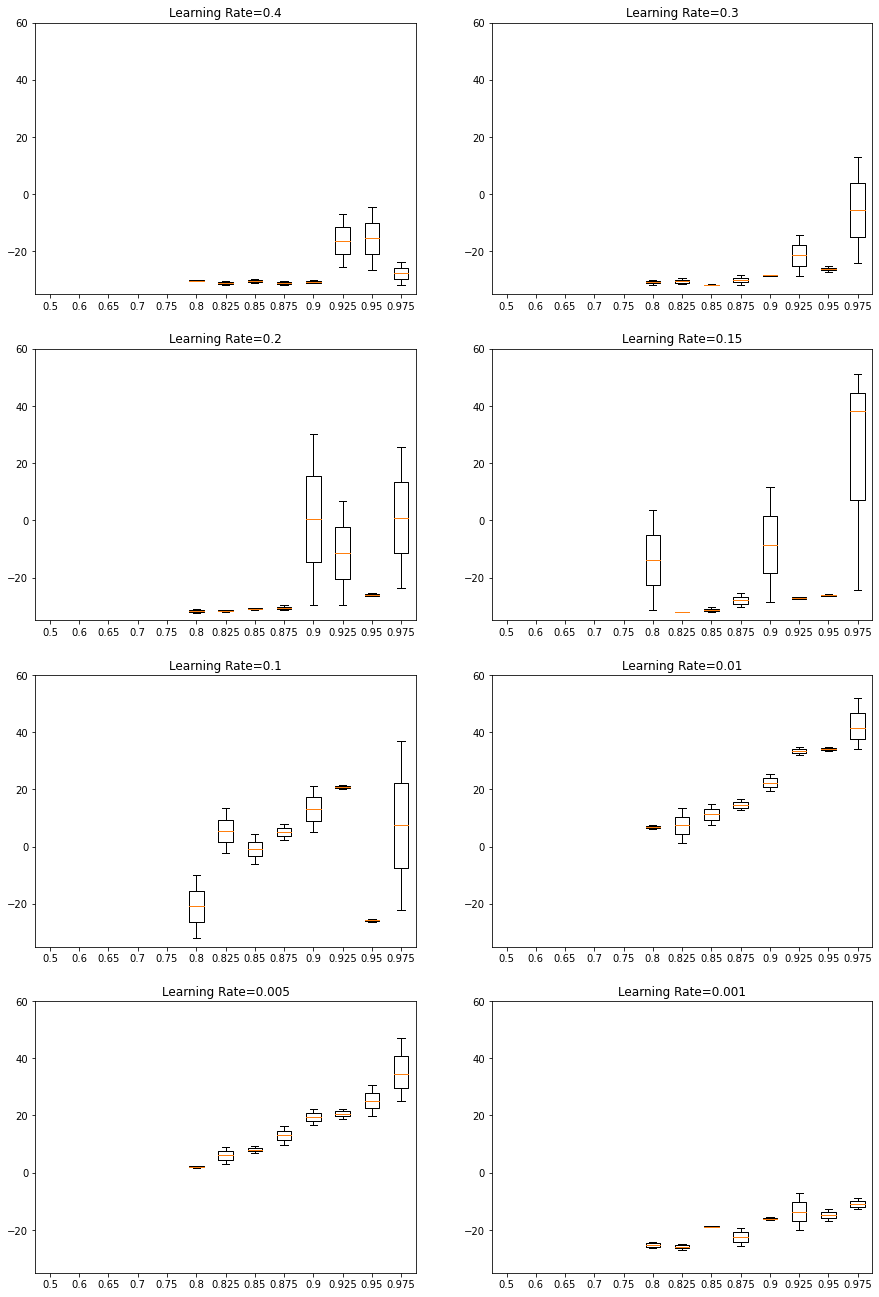

In [988]:
fig, ax = plt.subplots(4,2, figsize=(15,23))
coords = [[0,0],[0,1],[1,0],[1,1],[2,0],[2,1],[3,0],[3,1]]

for i, lr in enumerate(sorted(g_lr1,reverse=True)):
#     print(lr)
#     fig = plt.figure(figsize =(10, 7))
#     ax = fig.add_subplot(111)
    box_plots = []

    for q_param in sorted(g_q_params1):
        box_plots.append(df.query(f'q_param=={q_param} and episode_n==400 and lr=={lr}')['meaned'])
    x,y = coords[i]
    print(i,x,y)
    ax[x,y].boxplot(box_plots, labels=list(map(str, sorted(g_q_params1))))
    ax[x,y].set_title(f'Learning Rate={lr}')
    ax[x,y].set_ylim((-35, 60))
#     ax[x,y].set_xlim((0.5, 1))
#     plt.ylim((-35, 60))

#     ax[x,y].set_xticks(range(1, len(g_lr)+1), sorted(g_lr,reverse=True), rotation=45, ha='right')

#     ax[x,y].xticks(rotation=45)
# plt.title(f'Episodes Mean with Lr={lr} Episode_N=400 ')
# fig.autofmt_xdate(rotation=45)
plt.show()

In [947]:
fdf = df.query('lr<=0.01 and episode_n==400 and q_param >=0.9')
fdf

id version      lr  episode_n  trajectory_n  trajectory_len  \
85   68563901984      12  0.0100        400            50            1000   
86   68577748804      12  0.0010        400            50            1000   
87   68591586714      12  0.0050        400            50            1000   
93   68682978133      12  0.0100        400            50            1000   
94   68697817383      12  0.0010        400            50            1000   
95   68711309481      12  0.0050        400            50            1000   
101  68796186114      12  0.0100        400            50            1000   
102  68809635760      12  0.0010        400            50            1000   
103  68824269880      12  0.0050        400            50            1000   
109  68917656421      12  0.0100        400            50            1000   
110  68931869217      12  0.0010        400            50            1000   
111  68951149675      12  0.0050        400            50            1000   
149  70243955302      13  0.0100        400            50            1000   
150  70276442452      13  0.0010        400            50            1000   
151  70309241614      13  0.0050        400            50            1000   
157  70511984977      13  0.0100        400            50            1000   
158  70546699591      13  0.0010        400            50            1000   
159  70581076837      13  0.0050        400            50            1000   
165  70787338684      13  0.0100        400            50            1000   
166  70822913672      13  0.0010        400            50            1000   
167  70858516335      13  0.0050        400            50            1000   
173  71076239173      13  0.0100        400            50            1000   
174  71113395173      13  0.0010        400            50            1000   
175  71150766923      13  0.0050        400            50            1000   
176  77770533742      14  0.0050        400           200            1000   
177  77805012410      14  0.0050        400           200            1000   
178  77830043585      14  0.0050        400           200            1000   
179  78811756764      15  0.0075        400           200            1000   
180  78840611330      15  0.0100        400           200            1000   
183  78919077294      15  0.0075        400           200            1000   
184  78945001359      15  0.0100        400           200            1000   
187  79029923430      15  0.0075        400           200            1000   
188  79053646806      15  0.0100        400           200            1000   
191  79134281267      15  0.0075        400           200            1000   
192  79160893013      15  0.0100        400           200            1000   
195  79238915934      15  0.0075        400           200            1000   
196  79272434688      15  0.0100        400           200            1000   

     q_param  total_elapsed  finished  len_ed  ...      min70     meaned  \
85     0.900    8109.844507      True     400  ...   1.412292  19.405989   
86     0.900    9949.607186      True     400  ... -17.591108 -16.661516   
87     0.900    7988.942648      True     400  ...  24.507744  22.280602   
93     0.925    7416.258458      True     400  ...  29.092516  31.990777   
94     0.925    9934.880426      True     400  ... -27.172697 -19.985735   
95     0.925    8078.739081      True     400  ...  21.526037  18.715510   
101    0.950    6806.808478      True     400  ...   7.908864  33.237595   
102    0.950    9478.382501      True     400  ... -19.975823 -12.629832   
103    0.950    7992.963728      True     400  ...  27.686935  19.786641   
109    0.975    7150.666041      True     400  ...  24.552023  33.997689   
110    0.975    9441.426787      True     400  ... -18.277918 -12.779473   
111    0.975    7729.784511      True     400  ...  41.444864  25.066014   
149    0.900    7427.454957      True     400  ...  19.666281  25.310819   
150    0.900    9425.00

In [1026]:
Normalize

matplotlib.colors.Normalize

In [1027]:
cm

<module 'matplotlib.cm' from '/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/matplotlib/cm.py'>

{0.0075, 0.001, 0.01, 0.005}


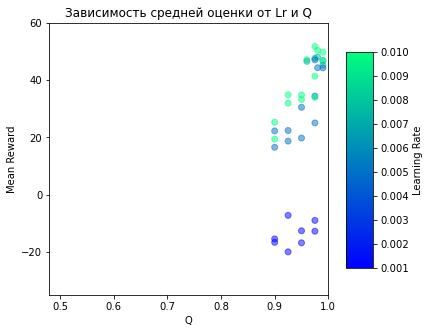

In [996]:
graph_data = []
fdf_ids = fdf['id'].tolist()
for ed in sorted(data, key=lambda x:-np.max(x['episode_data'])):
    if not (ed['id'] in fdf_ids): continue
    graph_data.append(ed)
plt.figure(figsize=(5,5))
ms = []
qs = []
lrs = []

for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    ms.append(np.mean(episode_data))
    qs.append(ed['q_param'])
    lrs.append(ed['lr'])
#     lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
#     print(ed['id'], lable)
#     plt.plot(range(len(episode_data)), 
#              episode_data,
#              alpha=0.8,#.9 if d['q_param'] == 0.9 else .9 ,
# #              linestyle=listyles[ed['type']],
# #              linestyle = 'dashed' if i > 6 else 'solid',
#              label=lable)

set_lrs = set(lrs)
print(set_lrs)
norm = Normalize(vmin=min(set_lrs), vmax=max(set_lrs))
m = cm.ScalarMappable(norm=norm, cmap=cmap)

plt.scatter(qs, ms, 
#             s=np.array(lrs)*10000, 
            c=m.to_rgba(lrs),
            alpha=0.5)
# leg = plt.legend(loc='lower right')
# plt.ylim(ylim)
plt.xlim((0.48, 1.0))
plt.ylim((-35,60))
plt.xlabel("Q")
plt.ylabel("Mean Reward")
plt.title('Зависимость средней оценки от Lr и Q')

cax = plt.axes([0.95, 0.2, 0.075, 0.6])
plt.colorbar(mappable=m, cax=cax)

plt.ylabel("Learning Rate")
plt.show()

In [736]:
df.query('version=="14"')

id version     lr  episode_n  trajectory_n  trajectory_len  \
176  77770533742      14  0.005        400           200            1000   
177  77805012410      14  0.005        400           200            1000   
178  77830043585      14  0.005        400           200            1000   

     q_param  total_elapsed  finished  len_ed  ...      min70     meaned  \
176    0.975   13086.155364     False     298  ...  40.681252  43.166797   
177    0.980   13093.580259     False     287  ...  34.719560  38.928268   
178    0.990   13091.222615     False     295  ...  38.777256  40.750354   

     mean200_ed  mean25_ed  mean50_ed    std_ed  layers_cnt  layers_n1  \
176   34.941051  59.753791  60.937676  7.459393           1        200   
177   30.205964  58.259036  58.566750  9.971379           1        200   
178   31.801636  56.607780  57.303212  7.349353           1        200   

     layers_n2 layers_n3  
176       None      None  
177       None      None  
178       None      None  

[3 rows x 21 columns]

In [739]:
fdf = df.query('q_param =0.9')
fdf

ValueError: cannot assign without a target object

68866188997 lr:0.3 Q:0.975 tn:50 ln:[50] t_len:1000
70720468754 lr:0.4 Q:0.95 tn:50 ln:[100] t_len:1000
70410068197 lr:0.3 Q:0.925 tn:50 ln:[100] t_len:1000
68666199134 lr:0.1 Q:0.925 tn:50 ln:[50] t_len:1000
71037817017 lr:0.1 Q:0.975 tn:50 ln:[100] t_len:1000
68514409868 lr:0.2 Q:0.9 tn:50 ln:[50] t_len:1000
68837581774 lr:0.15 Q:0.975 tn:50 ln:[50] t_len:1000
70787338684 lr:0.01 Q:0.95 tn:50 ln:[100] t_len:1000
70931428079 lr:0.2 Q:0.975 tn:50 ln:[100] t_len:1000
70477708732 lr:0.1 Q:0.925 tn:50 ln:[100] t_len:1000
68550800701 lr:0.1 Q:0.9 tn:50 ln:[50] t_len:1000
71150766923 lr:0.005 Q:0.975 tn:50 ln:[100] t_len:1000
77805012410 lr:0.005 Q:0.98 tn:200 ln:[200] t_len:1000
71076239173 lr:0.01 Q:0.975 tn:50 ln:[100] t_len:1000
70082322609 lr:0.15 Q:0.9 tn:50 ln:[100] t_len:1000
70581076837 lr:0.005 Q:0.925 tn:50 ln:[100] t_len:1000
70243955302 lr:0.01 Q:0.9 tn:50 ln:[100] t_len:1000
70511984977 lr:0.01 Q:0.925 tn:50 ln:[100] t_len:1000
77770533742 lr:0.005 Q:0.975 tn:200 ln:[200] t_le

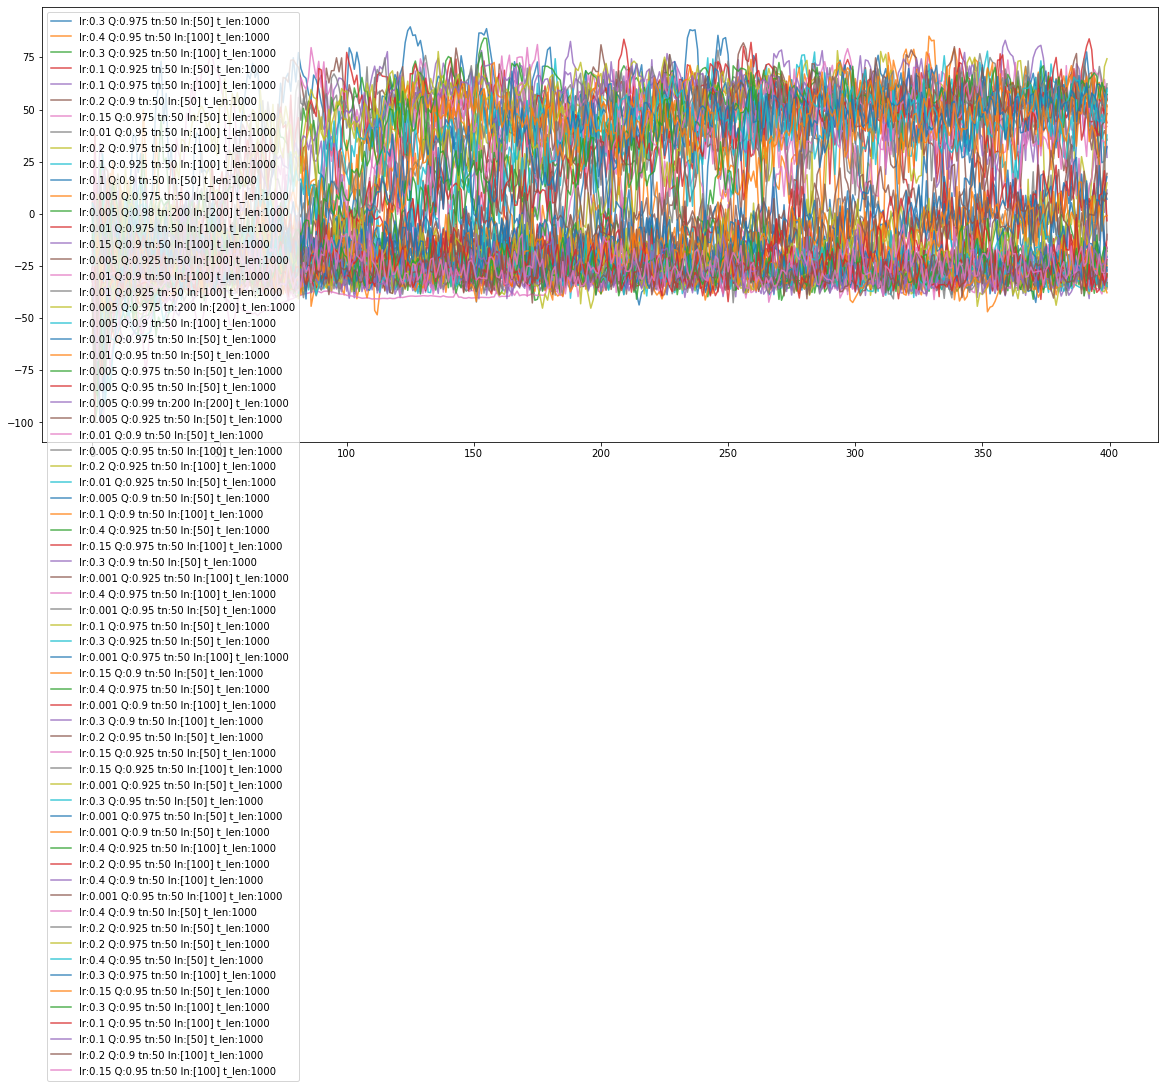

In [740]:
graph_data = []
fdf_ids = fdf['id'].tolist()
for ed in sorted(data, key=lambda x:-np.max(x['episode_data'])):
    if not (ed['id'] in fdf_ids): continue
    graph_data.append(ed)
# graph_data = graph_data[:5]
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    
    episode_data = np.array(ed['episode_data'])
    lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data,
             alpha=0.8,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
leg = plt.legend(loc='upper left')
plt.ylim(ylim)
plt.show()

In [467]:
best_of_the_best = []

In [484]:
lr_candidates = [
'68866188997',
'70720468754',
'68448510492',
'70410068197',
'68666199134',
'71037817017',
'68514409868',
]

In [468]:
for d in data:
    arr = d['episode_data']
    if np.max(arr)>0:
        best_of_the_best.append(d['id'])
    print(d['id'], np.max(arr))

65771456929 13.627231614856361
65772251499 -3.507811552388782
65773318406 -2.5370639858624715
65774252849 21.987288485037787
65775238157 -6.28797156205219
65776255695 -3.531501375758872
65777615538 -11.035762312587497
65779145087 1.1501086812057273
65780578155 -2.8273444066568594
65783725084 22.315950356615218
65785992767 10.458025212840507
65788026523 27.978514574560663
65791966319 30.242039601367427
65795149451 -12.01101531927529
65797576931 5.891534655999643
65801139728 -18.516696594239093
65804087001 -11.350059148389901
65807916216 -7.932809904101289
65813250612 14.180043859204812
65816909985 8.325593789063122
65820281747 1.465902195495221
65824887148 -15.649371312299541
65828600011 -20.737199655037898
65832600528 -13.36904967013379
65837600965 0.707860148910985
65841958926 -18.28930925053797
65847433906 12.825914178482368
65853274172 9.826599918147572
65859335449 -11.358111471244142
65865452139 -4.330778614199508
65871017047 -9.984936859180024
65878132468 6.680331143898668
6588414

In [519]:
lr_candidates = [
'70581076837',
'70858516335',
'71150766923'


]

65968560182 lr:0.1 Q:0.8 tn:50 ln:[50] t_len:1000
65977734402 lr:0.01 Q:0.8 tn:50 ln:[50] t_len:1000
65791966319 lr:0.1 Q:0.6 tn:50 ln:[50] t_len:1000
65788026523 lr:0.4 Q:0.6 tn:50 ln:[50] t_len:1000
65891992335 lr:0.2 Q:0.75 tn:50 ln:[50] t_len:1000


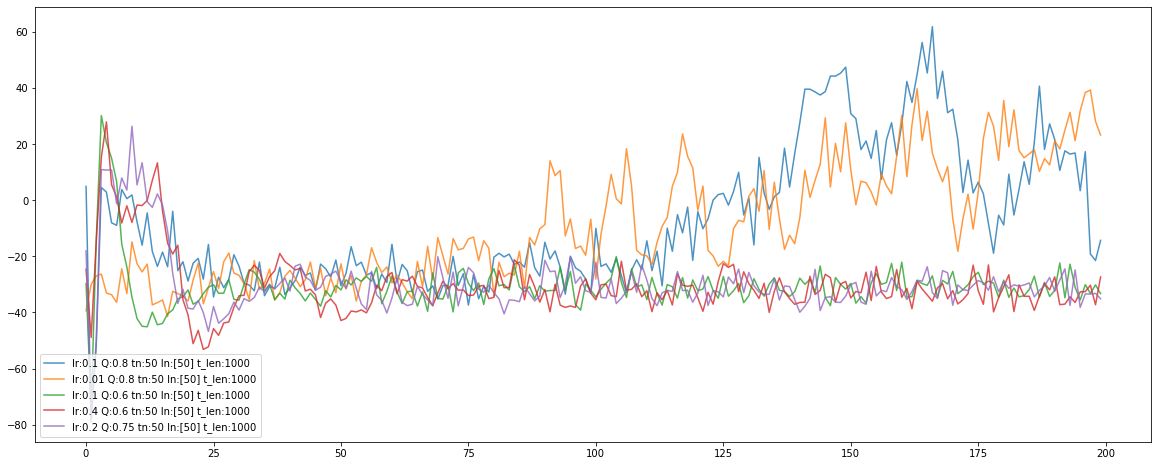

In [437]:

# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]
graph_data = []
for ed in sorted(data, key=lambda x:-np.max(x['episode_data'])):
#     if ed['q_param']!=0.5:continue
#     if ed['trajectory_n']!=150:continue
    if ed['version']!='11':continue
    if not (ed['id'] in best_of_the_best): continue
    graph_data.append(ed)
graph_data = graph_data[:5]
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    
    episode_data = np.array(ed['episode_data'])
    lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data,
             alpha=0.8,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
leg = plt.legend(loc='lower left')


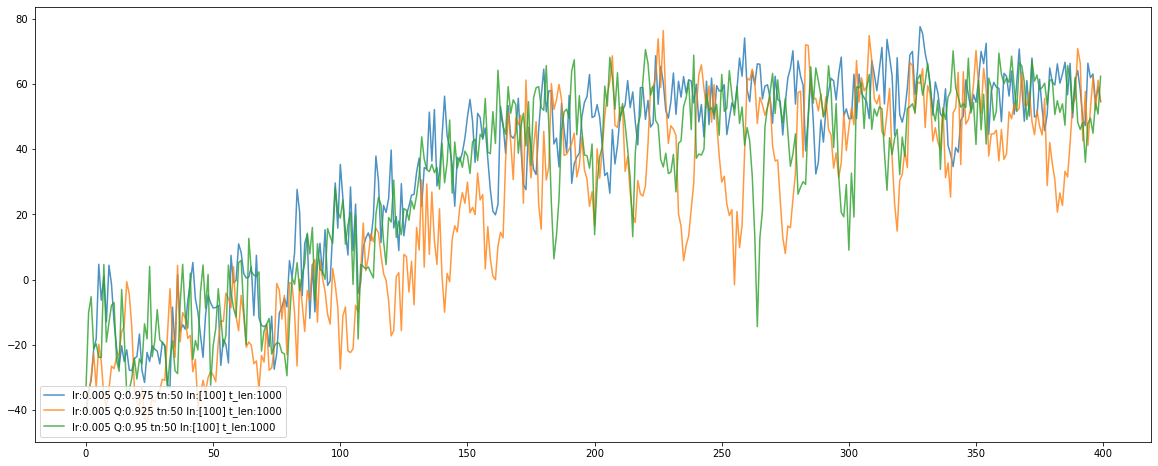

In [521]:
graph_data = []
for ed in data:
    if not (ed['id'] in lr_candidates): continue
    graph_data.append(ed)
graph_data = []
for ed in sorted(data, key=lambda x:-np.max(x['episode_data'])):
    if not (ed['id'] in lr_candidates): continue
    graph_data.append(ed)
# graph_data = graph_data[:2]
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    
    episode_data = np.array(ed['episode_data'])
    lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
#     print(ed['id'], lable,np.max(ed['episode_data']), np.argmax(ed['episode_data']))
    plt.plot(range(len(episode_data)), 
             episode_data,
             alpha=0.8,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
leg = plt.legend(loc='lower left')


In [522]:
df

id version     lr  episode_n  trajectory_n  trajectory_len  \
0    65771456929      11  0.150        200            50            1000   
1    65772251499      11  0.200        200            50            1000   
2    65773318406      11  0.300        200            50            1000   
3    65774252849      11  0.400        200            50            1000   
4    65775238157      11  0.100        200            50            1000   
..           ...     ...    ...        ...           ...             ...   
171  71000558507      13  0.400        400            50            1000   
172  71037817017      13  0.100        400            50            1000   
173  71076239173      13  0.010        400            50            1000   
174  71113395173      13  0.001        400            50            1000   
175  71150766923      13  0.005        400            50            1000   

     q_param  total_elapsed  finished  len_ed  ...      min70     meaned  \
0      0.500    3623.656214      True     200  ... -39.598019 -30.927994   
1      0.500    3563.412664      True     200  ... -39.527885 -32.875247   
2      0.500    3677.951497      True     200  ... -39.528288 -32.458679   
3      0.500    3587.621751      True     200  ... -39.611803 -29.077089   
4      0.500    3624.185472      True     200  ... -39.447066 -31.177327   
..       ...            ...       ...     ...  ...        ...        ...   
171    0.975    7896.759211      True     400  ... -41.094718 -31.602580   
172    0.975    5869.773415      True     400  ...  -6.262414  36.867827   
173    0.975    5603.157811      True     400  ...  15.136737  41.412400   
174    0.975    7114.904076      True     400  ... -11.307189  -9.005322   
175    0.975    5541.088187      True     400  ...  34.635397  34.458972   

     mean200_ed  mean25_ed  mean50_ed     std_ed  layers_cnt  layers_n1  \
0    -30.927994 -32.156485 -32.450967   4.008298           1         50   
1    -32.875247 -32.128155 -32.924760   3.691733           1         50   
2    -32.458679 -30.920269 -32.052127   4.340452           1         50   
3    -29.077089 -31.864193 -32.658231   3.857015           1         50   
4    -31.177327 -31.325184 -31.323147   4.334251           1         50   
..          ...        ...        ...        ...         ...        ...   
171  -40.625351 -24.038131 -23.772577   7.145130           1        100   
172   21.148438  50.989577  51.793675  22.138917           1        100   
173   28.500165  56.156445  55.712784  11.728456           1        100   
174  -18.077683  10.338000   8.185675   8.726390           1        100   
175   12.882586  58.507951  58.587538   6.907679           1        100   

     layers_n2 layers_n3  
0         None      None  
1         None      None  
2         None      None  
3         None      None  
4         None      None  
..         ...       ...  
171       None      None  
172       None      None  
173       None      None  
174       None      None  
175       None      None  

[176 rows x 21 columns]

(array([26.,  5.,  3.,  5.,  4.,  7.,  3.,  5.,  1.,  5.]),
 array([-32.37726636, -24.99829977, -17.61933317, -10.24036658,
         -2.86139999,   4.51756661,  11.8965332 ,  19.2754998 ,
         26.65446639,  34.03343298,  41.41239958]),
 <a list of 10 Patch objects>)

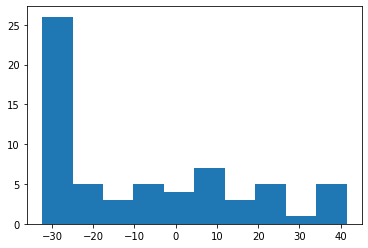

In [527]:
plt.hist(df.query('layers_n1==100')['meaned'].tolist())

In [ ]:
groups = {
}
for d in data:
    group = d['layers_n'][0]
    key =f"{d['q_param']} {d['trajectory_n']} {d['trajectory_len']}"
    
    compare[key] = 
    key

(array([26.,  5.,  3.,  5.,  4.,  7.,  3.,  5.,  1.,  5.]),
 array([-32.37726636, -24.99829977, -17.61933317, -10.24036658,
         -2.86139999,   4.51756661,  11.8965332 ,  19.2754998 ,
         26.65446639,  34.03343298,  41.41239958]),
 <a list of 10 Patch objects>)

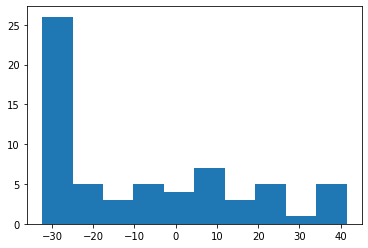

In [563]:
plt.hist(df.query('layers_n1==100')['meaned'].tolist())

(array([71., 11.,  3.,  3.,  2.,  6.,  5.,  5.,  2.,  4.]),
 array([-32.87524653, -25.76873407, -18.66222161, -11.55570915,
         -4.44919669,   2.65731577,   9.76382823,  16.87034068,
         23.97685314,  31.0833656 ,  38.18987806]),
 <a list of 10 Patch objects>)

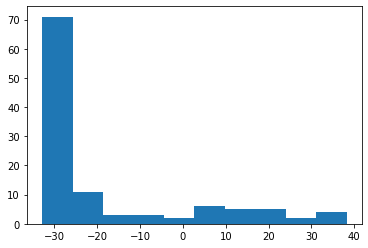

In [564]:
plt.hist(df.query('layers_n1==50')['meaned'].tolist())

In [438]:
winner = list(filter(lambda x: x['id'] == '65968560182', data))
np.argmax(winner[0]['episode_data'])

166

In [439]:
set([d['version'] for d in data])

{'11', '12', '13'}

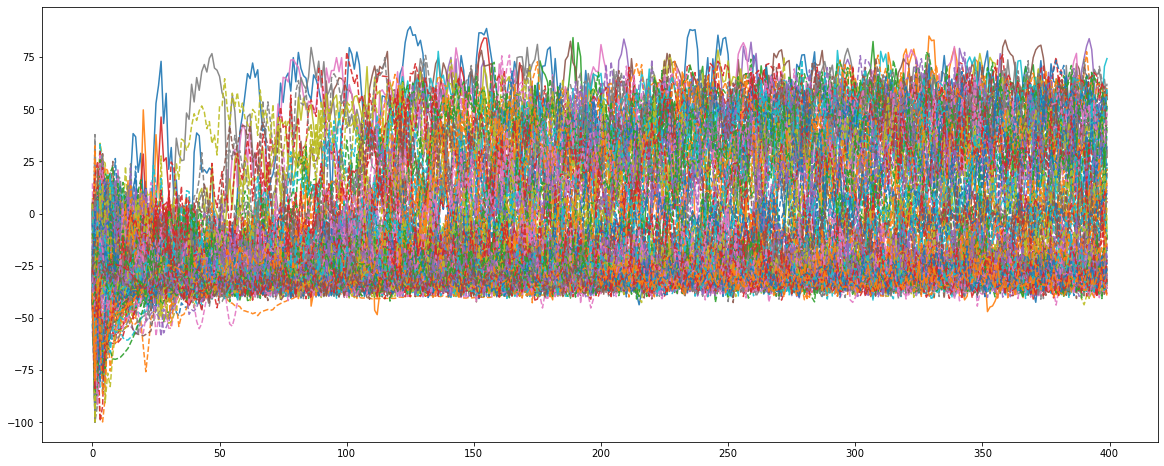

In [440]:
# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]

# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data']))):
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
#     print(ed['id'])
    episode_data = np.array(ed['episode_data'])
    lable = f"Lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
#     print(ed['id'], lable)

    plt.plot(range(len(episode_data)), 
             episode_data,
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 10 else 'solid',
             label=lable)
# leg = plt.legend(loc='lower right')


In [445]:
# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]
graph_data = []
for ed in sorted(data, key=lambda x:-np.max(x['mean25_ed'])):
#     if ed['q_param']!=0.5:continue
#     if ed['trajectory_n']!=150:continue
    if ed['version']!='12':continue
#     if not (ed['id'] in best_of_the_best): continue
    graph_data.append(ed)
graph_data = graph_data[:10]
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    
    episode_data = np.array(ed['episode_data'])
    lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data,
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
# leg = plt.legend(loc='lower left')


KeyError: 'mean25_ed'

70720468754 lr:0.4 Q:0.95 tn:50 ln:[100] t_len:1000
70410068197 lr:0.3 Q:0.925 tn:50 ln:[100] t_len:1000
71037817017 lr:0.1 Q:0.975 tn:50 ln:[100] t_len:1000
70787338684 lr:0.01 Q:0.95 tn:50 ln:[100] t_len:1000
70931428079 lr:0.2 Q:0.975 tn:50 ln:[100] t_len:1000
70477708732 lr:0.1 Q:0.925 tn:50 ln:[100] t_len:1000
71150766923 lr:0.005 Q:0.975 tn:50 ln:[100] t_len:1000
71076239173 lr:0.01 Q:0.975 tn:50 ln:[100] t_len:1000
70082322609 lr:0.15 Q:0.9 tn:50 ln:[100] t_len:1000
70581076837 lr:0.005 Q:0.925 tn:50 ln:[100] t_len:1000
70243955302 lr:0.01 Q:0.9 tn:50 ln:[100] t_len:1000
70511984977 lr:0.01 Q:0.925 tn:50 ln:[100] t_len:1000
69988448344 lr:0.01 Q:0.875 tn:50 ln:[100] t_len:1000
70309241614 lr:0.005 Q:0.9 tn:50 ln:[100] t_len:1000
69958348013 lr:0.1 Q:0.875 tn:50 ln:[100] t_len:1000
70858516335 lr:0.005 Q:0.95 tn:50 ln:[100] t_len:1000
70375171835 lr:0.2 Q:0.925 tn:50 ln:[100] t_len:1000
70209425527 lr:0.1 Q:0.9 tn:50 ln:[100] t_len:1000
70049965399 lr:0.005 Q:0.875 tn:50 ln:[100]

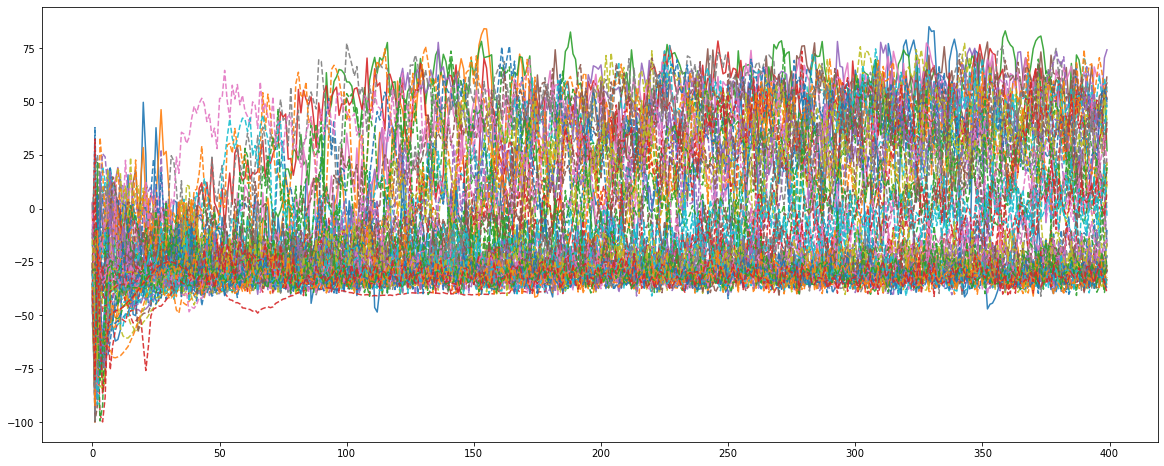

In [442]:
# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]
graph_data = []
for ed in sorted(data, key=lambda x:-np.max(x['episode_data'])):
#     if ed['q_param']!=0.5:continue
#     if ed['trajectory_n']!=150:continue
    if ed['version']!='13':continue
#     if not (ed['id'] in best_of_the_best): continue
    graph_data.append(ed)
graph_data = graph_data
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    
    episode_data = np.array(ed['episode_data'])
    lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data,
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
# leg = plt.legend(loc='lower left')


68866188997 lr:0.3 Q:0.975 tn:50 ln:[50] t_len:1000


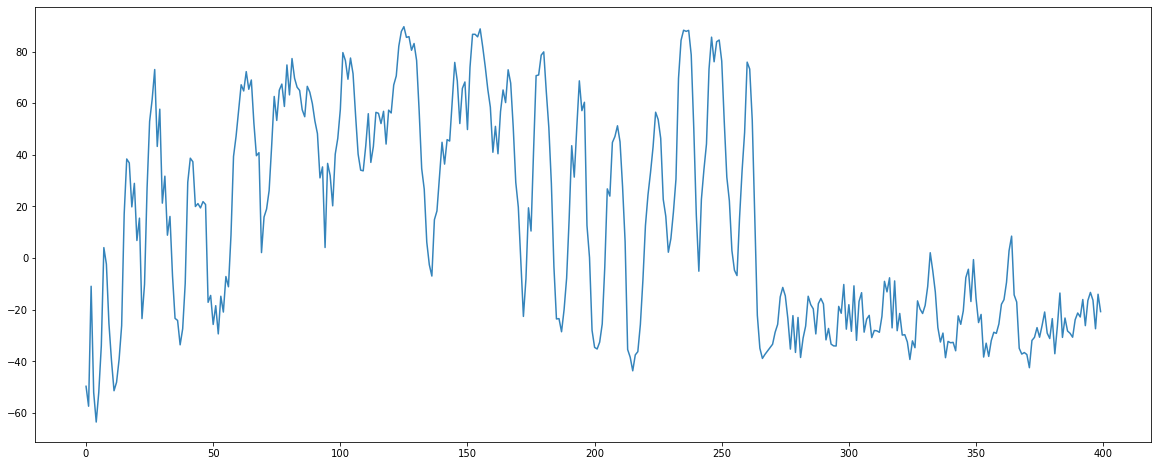

In [400]:
# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]
graph_data = []
for ed in sorted(data, key=lambda x:-np.max(x['episode_data'])):
#     if ed['q_param']!=0.5:continue
#     if ed['trajectory_n']!=150:continue
    if ed['version']!='12':continue
    if not (ed['id'] in ['68866188997']): continue
    graph_data.append(ed)
graph_data = graph_data
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    
    episode_data = np.array(ed['episode_data'])
    lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data,
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
# leg = plt.legend(loc='lower left')


In [401]:
winner = list(filter(lambda x: x['id'] == '68866188997', data))
np.argmax(winner[0]['episode_data'])

125

78945001359 lr:0.01 Q:0.975 tn:200 ln:[200] t_len:1000
78840611330 lr:0.01 Q:0.96 tn:200 ln:[200] t_len:1000
79029923430 lr:0.0075 Q:0.98 tn:200 ln:[200] t_len:1000
78998331192 lr:0.15 Q:0.975 tn:200 ln:[200] t_len:1000
78863754286 lr:0.125 Q:0.96 tn:200 ln:[200] t_len:1000
77805012410 lr:0.005 Q:0.98 tn:200 ln:[200] t_len:1000
78919077294 lr:0.0075 Q:0.975 tn:200 ln:[200] t_len:1000
79053646806 lr:0.01 Q:0.98 tn:200 ln:[200] t_len:1000
79212862259 lr:0.15 Q:0.99 tn:200 ln:[200] t_len:1000
79160893013 lr:0.01 Q:0.99 tn:200 ln:[200] t_len:1000
79134281267 lr:0.0075 Q:0.99 tn:200 ln:[200] t_len:1000
77770533742 lr:0.005 Q:0.975 tn:200 ln:[200] t_len:1000
78811756764 lr:0.0075 Q:0.96 tn:200 ln:[200] t_len:1000
77830043585 lr:0.005 Q:0.99 tn:200 ln:[200] t_len:1000
79107052837 lr:0.15 Q:0.98 tn:200 ln:[200] t_len:1000
79185073744 lr:0.125 Q:0.99 tn:200 ln:[200] t_len:1000
79272434688 lr:0.01 Q:0.99 tn:200 ln:[200] t_len:1000
79079968561 lr:0.125 Q:0.98 tn:200 ln:[200] t_len:1000
7923891593

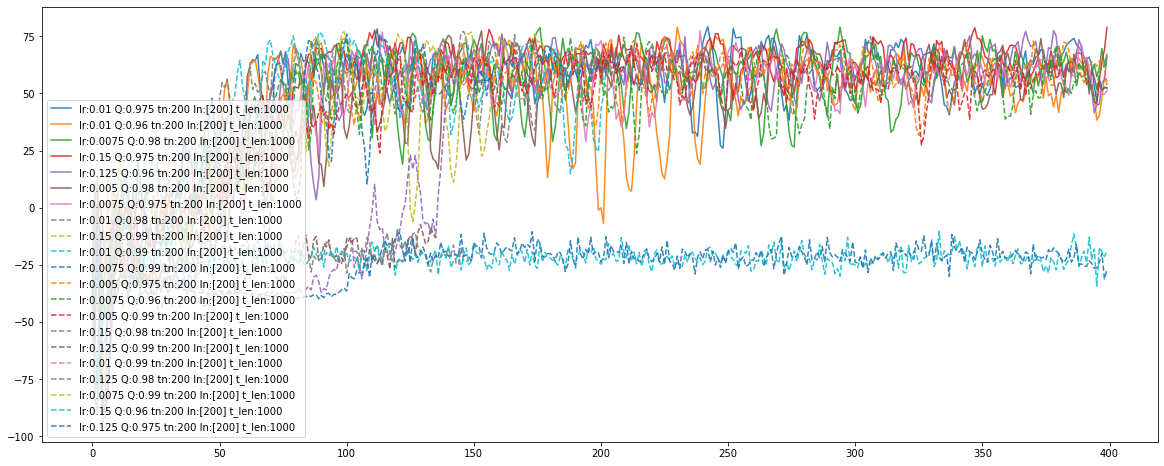

In [851]:
# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]
graph_data = []
for ed in sorted(data, key=lambda x:-np.max(x['episode_data'])):
    if not( ed['version']in('14','15')):continue
    graph_data.append(ed)
graph_data = graph_data
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    
    episode_data = np.array(ed['episode_data'])
    lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data,
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
leg = plt.legend(loc='lower left')


In [838]:
g_lr

{'0.001',
 '0.005',
 '0.0075',
 '0.01',
 '0.1',
 '0.125',
 '0.15',
 '0.2',
 '0.3',
 '0.4'}

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


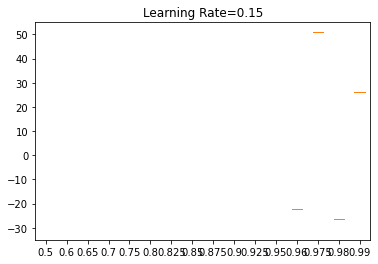

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


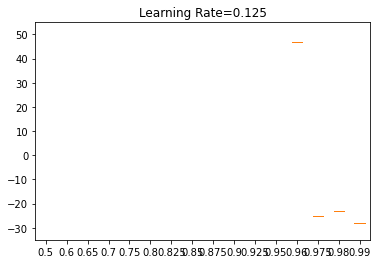

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


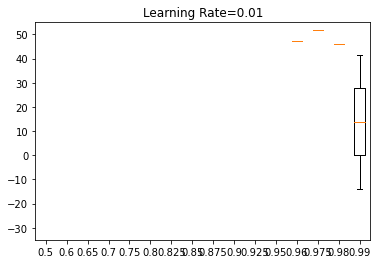

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


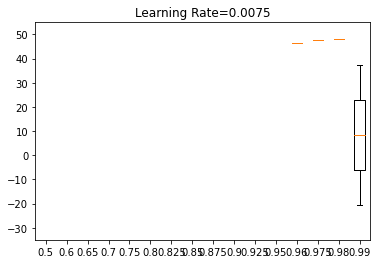

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


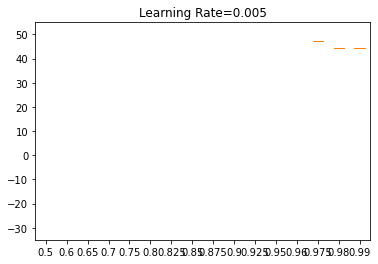

In [852]:
# fig, ax = plt.subplots(4,2, figsize=(15,23))
coords = [[0,0],[0,1],[1,0],[1,1],[2,0],[2,1],[3,0],[3,1]]

for i, lr in enumerate(sorted(g_lr,reverse=True)):
#     print(lr)

#     fig = plt.figure(figsize =(10, 7))
#     ax = fig.add_subplot(111)
    
    box_plots = []

    for q_param in sorted(g_q_params):
        meaned = df.query(f'version in("14","15") and q_param=={q_param} and episode_n==400 and lr=={lr}')['meaned']
#         if len(meaned)>0:
        box_plots.append(meaned.to_list())
    if len(box_plots)==0:
        continue

#     x,y = coords[i]
    if np.sum(box_plots)==0:continue
    plt.boxplot(box_plots, labels=list(map(str, sorted(g_q_params))))
    plt.title(f'Learning Rate={lr}')
    plt.ylim((-35, 55))
#     print(i,x,y)
    plt.show()
#     ax[x,y].boxplot(box_plots, labels=list(map(str, sorted(g_q_params))))
#     ax[x,y].set_title(f'Learning Rate={lr}')
#     ax[x,y].set_ylim((-35, 45))

#     ax[x,y].xticks(rotation=45)
# plt.title(f'Episodes Mean with Lr={lr} Episode_N=400 ')
# fig.autofmt_xdate(rotation=45)
plt.show()

In [859]:
ed['lr']==0.001

True

0.001
0.005
77830043585 214 lr:0.005 Q:0.99 tn:200 ln:[200] t_len:1000
77805012410 153 lr:0.005 Q:0.98 tn:200 ln:[200] t_len:1000
77770533742 225 lr:0.005 Q:0.975 tn:200 ln:[200] t_len:1000
0.0075
79134281267 113 lr:0.0075 Q:0.99 tn:200 ln:[200] t_len:1000
79238915934 0 lr:0.0075 Q:0.99 tn:200 ln:[200] t_len:1000
79029923430 294 lr:0.0075 Q:0.98 tn:200 ln:[200] t_len:1000
78919077294 239 lr:0.0075 Q:0.975 tn:200 ln:[200] t_len:1000
78811756764 306 lr:0.0075 Q:0.96 tn:200 ln:[200] t_len:1000
0.01
79160893013 89 lr:0.01 Q:0.99 tn:200 ln:[200] t_len:1000
79272434688 8 lr:0.01 Q:0.99 tn:200 ln:[200] t_len:1000
79053646806 146 lr:0.01 Q:0.98 tn:200 ln:[200] t_len:1000
78945001359 242 lr:0.01 Q:0.975 tn:200 ln:[200] t_len:1000
78840611330 230 lr:0.01 Q:0.96 tn:200 ln:[200] t_len:1000
0.1
0.125
79185073744 2 lr:0.125 Q:0.99 tn:200 ln:[200] t_len:1000
79079968561 0 lr:0.125 Q:0.98 tn:200 ln:[200] t_len:1000
78974017509 2 lr:0.125 Q:0.975 tn:200 ln:[200] t_len:1000
78863754286 378 lr:0.125 Q:0.

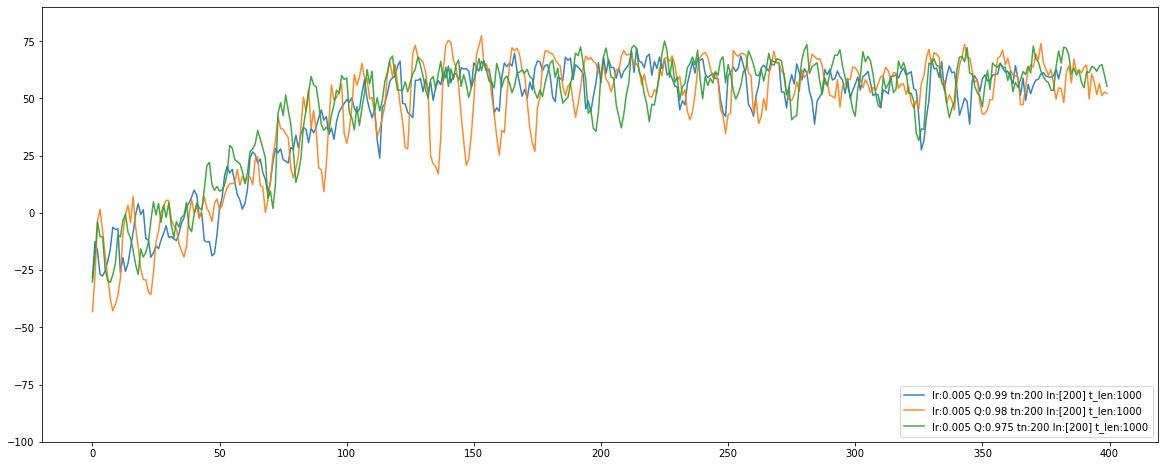

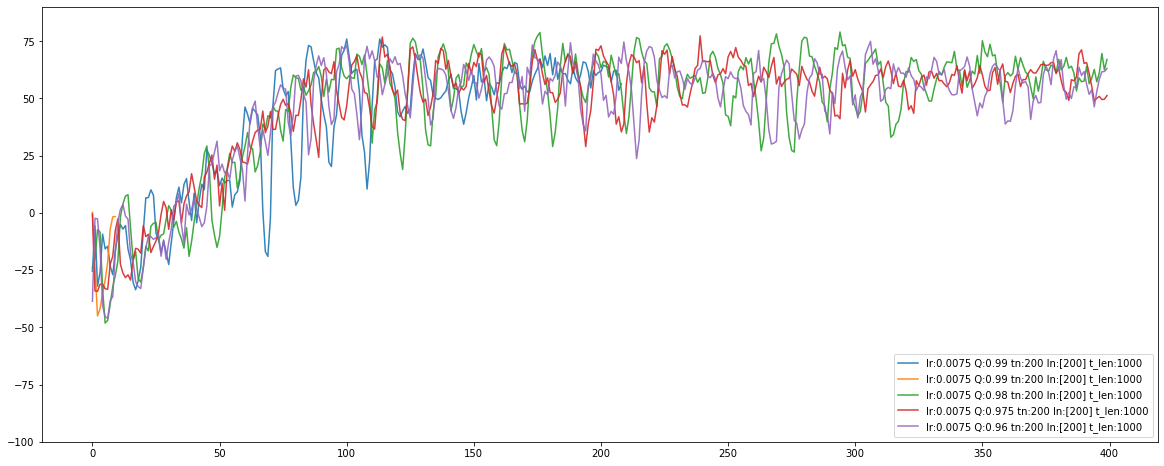

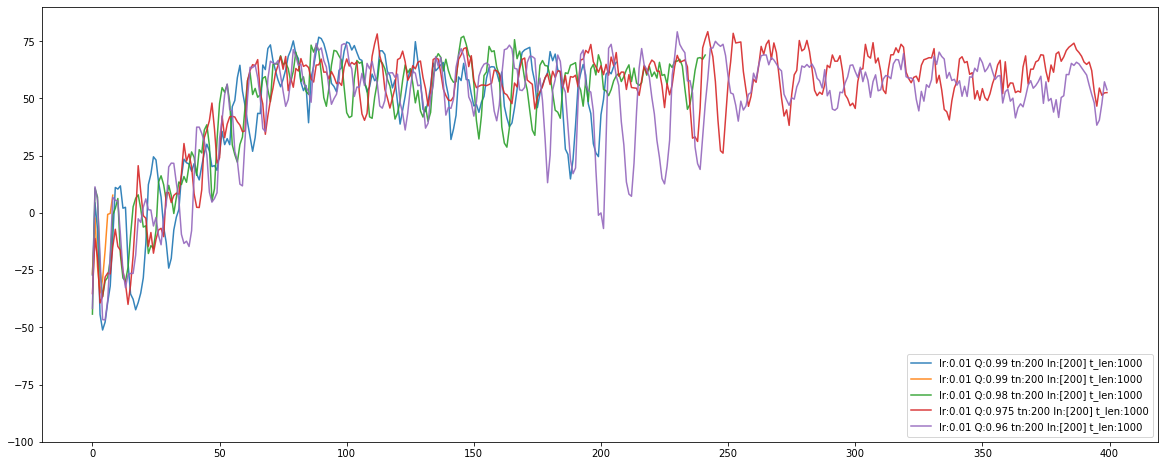

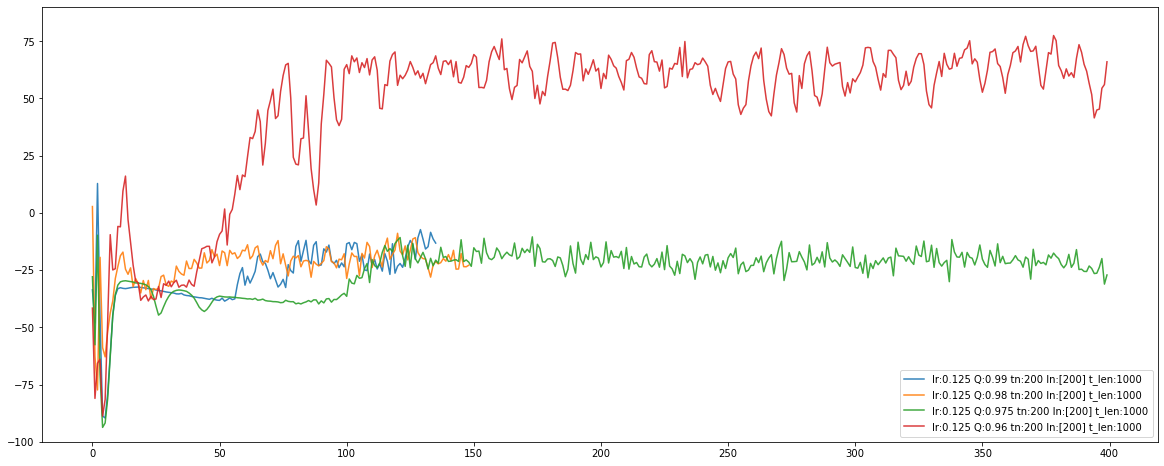

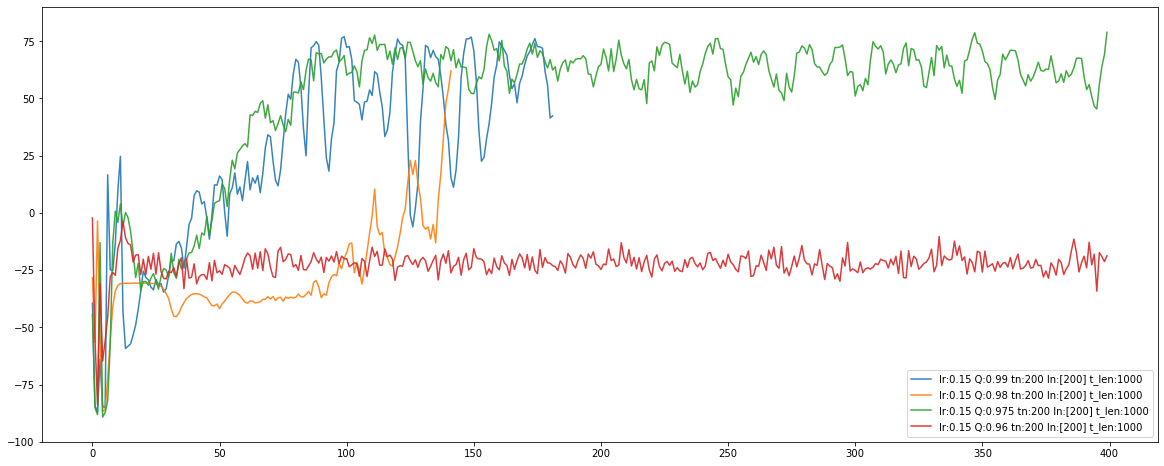

In [880]:
# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]
for lr in sorted(g_lr):
    print(lr)
    graph_data = []
    for ed in sorted(data, key=lambda x:-np.max(x['q_param'])):
        if not( ed['version']in('14','15')): continue
        if str(ed['lr'])!=str(lr): continue
        graph_data.append(ed)
#         print(ed['lr'])
        
    if len(graph_data)==0:continue
    graph_data = graph_data
    plt.figure(figsize=(20,8))
    plt.ylim((-100,90))
    for i, ed in enumerate(graph_data):

        episode_data = np.array(ed['episode_data'])
        m = np.round(np.mean(episode_data),2)
        s =  np.round(np.std(episode_data),2)
        n = np.argmax(episode_data)
        lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
        print(ed['id'],n, lable)
        plt.plot(range(len(episode_data)), 
                 episode_data,
                 alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
    #              linestyle=listyles[ed['type']],
                 linestyle = 'dashed' if i > 6 else 'solid',
                 label=lable)
    leg = plt.legend(loc='lower right')


In [928]:
fdf.columns

Index(['id', 'version', 'lr', 'episode_n', 'trajectory_n', 'trajectory_len',
       'q_param', 'total_elapsed', 'finished', 'len_ed', 'maxed', 'min70',
       'meaned', 'mean200_ed', 'mean25_ed', 'mean50_ed', 'std_ed',
       'layers_cnt', 'layers_n1', 'layers_n2', 'layers_n3'],
      dtype='object')

In [1001]:
fdf.shape

(21, 21)

In [1008]:
fdf = df.query('version in ("14","15")')
fdf[['lr','episode_n','trajectory_n','trajectory_len','q_param','layers_n1', 'meaned','maxed','std_ed']].sort_values('meaned', ascending=False).reset_index(drop=True)

lr  episode_n  trajectory_n  trajectory_len  q_param  layers_n1  \
0   0.1250        400           200            1000    0.990        200   
1   0.0100        400           200            1000    0.975        200   
2   0.1500        400           200            1000    0.975        200   
3   0.0100        400           200            1000    0.980        200   
4   0.0100        400           200            1000    0.990        200   
5   0.0075        400           200            1000    0.980        200   
6   0.0100        400           200            1000    0.990        200   
7   0.0075        400           200            1000    0.975        200   
8   0.0100        400           200            1000    0.960        200   
9   0.0050        400           200            1000    0.975        200   
10  0.0075        400           200            1000    0.990        200   
11  0.0075        400           200            1000    0.990        200   
12  0.1250        400           200            1000    0.960        200   
13  0.0075        400           200            1000    0.960        200   
14  0.1500        400           200            1000    0.990        200   
15  0.0050        400           200            1000    0.980        200   
16  0.0050        400           200            1000    0.990        200   
17  0.1500        400           200            1000    0.980        200   
18  0.1250        400           200            1000    0.990        200   
19  0.1250        400           200            1000    0.980        200   
20  0.1500        400           200            1000    0.960        200   
21  0.1500        400           200            1000    0.990        200   
22  0.1250        400           200            1000    0.975        200   

       meaned      maxed     std_ed  
0   55.954001  80.420275   4.484298  
1   51.813076  79.202570   7.443827  
2   51.008727  78.915701   6.571542  
3   50.501530  77.188026   5.312449  
4   49.772590  78.182561  14.487606  
5   48.107366  79.029629   5.479761  
6   47.752600  75.713705   5.956383  
7   47.691673  77.376719   5.520585  
8   47.192096  79.136772   7.337331  
9   47.112632  75.086075   5.337523  
10  46.933476  74.918063   6.589392  
11  46.914192  77.356556   5.247891  
12  46.797835  77.503489   8.388949  
13  46.585191  74.957905   7.655884  
14  45.491120  80.360046   5.569642  
15  44.375139  77.385949   7.546818  
16  44.315393  71.947714   5.563455  
17  30.601729  78.392968  12.098192  
18  22.364674  73.979430   3.774832  
19 -21.210259   2.783608   3.171745  
20 -22.391005  -2.209317   3.885031  
21 -24.826349 -12.353159   3.999989  
22 -25.225068  -9.736354   3.337170

In [1009]:
fdf

id version      lr  episode_n  trajectory_n  trajectory_len  \
176  77770533742      14  0.0050        400           200            1000   
177  77805012410      14  0.0050        400           200            1000   
178  77830043585      14  0.0050        400           200            1000   
179  78811756764      15  0.0075        400           200            1000   
180  78840611330      15  0.0100        400           200            1000   
181  78863754286      15  0.1250        400           200            1000   
182  78887028594      15  0.1500        400           200            1000   
183  78919077294      15  0.0075        400           200            1000   
184  78945001359      15  0.0100        400           200            1000   
185  78974017509      15  0.1250        400           200            1000   
186  78998331192      15  0.1500        400           200            1000   
187  79029923430      15  0.0075        400           200            1000   
188  79053646806      15  0.0100        400           200            1000   
189  79079968561      15  0.1250        400           200            1000   
190  79107052837      15  0.1500        400           200            1000   
191  79134281267      15  0.0075        400           200            1000   
192  79160893013      15  0.0100        400           200            1000   
193  79185073744      15  0.1250        400           200            1000   
194  79212862259      15  0.1500        400           200            1000   
195  79238915934      15  0.0075        400           200            1000   
196  79272434688      15  0.0100        400           200            1000   
197  79310522974      15  0.1250        400           200            1000   
198  79341731558      15  0.1500        400           200            1000   

     q_param  total_elapsed  finished  len_ed  ...      min70     meaned  \
176    0.975   17027.099569      True     400  ...  41.632735  47.112632   
177    0.980   17480.512069      True     400  ...  43.157667  44.375139   
178    0.990   16462.636350     False     382  ...  27.534930  44.315393   
179    0.960   17707.715496      True     400  ...  38.816661  46.585191   
180    0.960   17418.526363      True     400  ...  38.330555  47.192096   
181    0.960   17418.470847      True     400  ...  41.507386  46.797835   
182    0.960   26528.996997      True     400  ... -34.196160 -22.391005   
183    0.975   17738.368243      True     400  ...  49.024261  47.691673   
184    0.975   16598.999699      True     400  ...  40.601758  51.813076   
185    0.975   26574.640701      True     400  ... -31.105153 -25.225068   
186    0.975   17090.600691      True     400  ...  45.395838  51.008727   
187    0.980   17288.705683      True     400  ...  48.287839  48.107366   
188    0.980   17496.213780      True     400  ...  47.737072  50.501530   
189    0.980   24622.132285     False     359  ... -29.218471 -21.210259   
190    0.980   20782.436359      True     400  ...  19.622842  30.601729   
191    0.990   18229.090142      True     400  ...  45.523817  46.914192   
192    0.990   18062.918175      True     400  ...   9.499534  49.772590   
193    0.990   22075.858927      True     400  ...  51.569419  22.364674   
194    0.990   18472.465338      True     400  ...  43.155067  45.491120   
195    0.990   15501.346137     False     332  ...  43.146724  46.933476   
196    0.990   15425.945338     False     335  ...  43.500342  47.752600   
197    0.990   12302.206550     False     291  ...  56.326944  55.954001   
198    0.990   12274.125868     False     170  ... -29.749350 -24.826349   

     mean200_ed  mean25_ed  mean50_ed     std_ed  layers_cnt  layers_n1  \
176   34.941051  62.007607  61.453786   5.337523           1        200   
177   30.205964  57.761709  58.644039   7.546818           1        200   
178   31.801636  59.032253  57.801071   5.563455           1        200   
179   37.209974  58.347445  55.645032   

[0.005, 0.0075, 0.01, 0.125, 0.15]


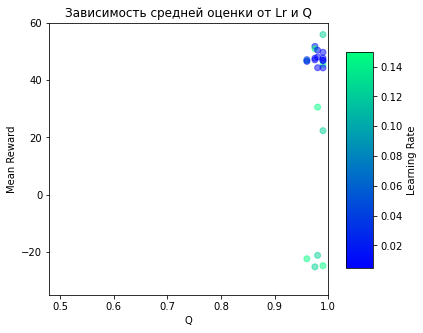

In [1010]:
cmap = cm.winter

graph_data = []
fdf_ids = fdf['id'].tolist()
for ed in sorted(data, key=lambda x:-np.max(x['episode_data'])):
    if not (ed['id'] in fdf_ids): continue
    graph_data.append(ed)
plt.figure(figsize=(5,5))
ms = []
qs = []
lrs = []


for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    ms.append(np.mean(episode_data))
    qs.append(ed['q_param'])
    lrs.append(ed['lr'])
#     lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
#     print(ed['id'], lable)
#     plt.plot(range(len(episode_data)), 
#              episode_data,
#              alpha=0.8,#.9 if d['q_param'] == 0.9 else .9 ,
# #              linestyle=listyles[ed['type']],
# #              linestyle = 'dashed' if i > 6 else 'solid',
#              label=lable)
set_lrs = set(lrs)
print(list(sorted(set_lrs)))
norm = Normalize(vmin=min(set_lrs), vmax=max(set_lrs))
m = cm.ScalarMappable(norm=norm, cmap=cmap)
# print()
plt.scatter(qs, ms, 
            c=m.to_rgba(lrs),
            alpha=0.5)
# leg = plt.legend(loc='lower right')
# plt.ylim(ylim)
plt.xlabel("Q")
plt.ylabel("Mean Reward")
plt.title('Зависимость средней оценки от Lr и Q')
plt.xlim((0.48, 1.0))
plt.ylim((-35,60))
cax = plt.axes([0.95, 0.2, 0.075, 0.6])
plt.colorbar(mappable=m, cax=cax)
plt.ylabel("Learning Rate")
plt.show()

In [1011]:
best_of_the_best = fdf.sort_values('meaned', ascending=False).reset_index(drop=True)['id'].tolist()[:3]

78998331192 lr:0.15 Q:0.975 tn:200 ln:[200] t_len:1000


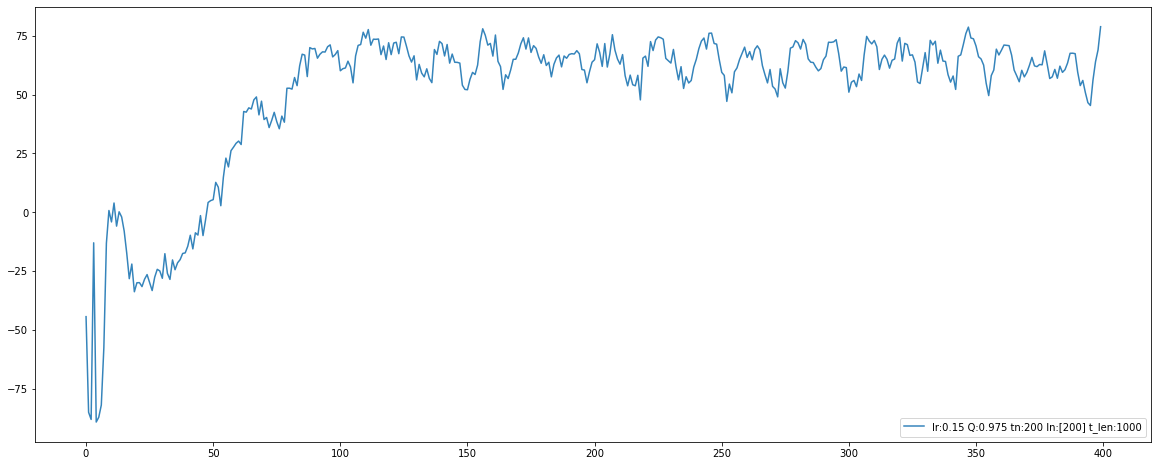

In [945]:
best_of_the_best
# влияние размера одного слоя сети сети на  
# Q:0.5  tn:100 L:[...]
graph_data = []
for ed in sorted(data, key=lambda x:-np.max(x['q_param'])):
#     if not( ed['version']in('14','15')):continue
    if not(ed['id'] in ['78998331192']):continue
    graph_data.append(ed)
graph_data = graph_data
plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    
    episode_data = np.array(ed['episode_data'])
    lable = f"lr:{ed['lr']} Q:{ed['q_param']} tn:{ed['trajectory_n']} ln:{ed['layers_n']} t_len:{ed['trajectory_len']}"
    print(ed['id'], lable)
    plt.plot(range(len(episode_data)), 
             episode_data,
             alpha=0.9,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
leg = plt.legend(loc='lower right')


In [907]:
norm(0.125)

0.8275862068965517

In [881]:
winner[0]['episode_data'][158]

27.686772693242553